In [1]:
import re
import warnings

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
path_of_train= "../data/train.csv"
path_of_test= "../data/test.csv"

df_train=pd.read_csv(path_of_train)
df_test=pd.read_csv(path_of_test)

In [3]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Kredi Puanı Veri Seti Kolon Açıklamaları

| Kolon Adı                 | Açıklama                                                                 | Mevcut Tür     | Olması Gereken Tür     |
|---------------------------|--------------------------------------------------------------------------|----------------|------------------------|
| ID                        | Bir girişin benzersiz kimliğini temsil eder                              | object         | Silinecek              |
| Customer_ID               | Bir kişinin benzersiz kimliğini temsil eder                              | object         | Silinecek              |
| Month                     | Yılın ayını temsil eder                                                  | object         | object (kategori)      |
| Name                      | Bir kişinin ismini temsil eder                                           | object         | object                 |
| Age                       | Kişinin yaşını temsil eder                                               | object         | int                    |
| SSN                       | Bir kişinin sosyal güvenlik numarasını temsil eder                       | object         | Silinecek              |
| Occupation                | Kişinin mesleğini temsil eder                                            | object         | object (kategori)      |
| Annual_Income             | Kişinin yıllık gelirini temsil eder                                      | object         | float                  |
| Monthly_Inhand_Salary     | Aylık baz maaşı temsil eder                                              | float64        | float                  |
| Num_Bank_Accounts         | Banka hesabı sayısını temsil eder                                        | int64          | int                    |
| Num_Credit_Card           | Diğer kredi kartı sayısını temsil eder                                   | int64          | int                    |
| Interest_Rate             | Kredi kartı faiz oranını temsil eder                                     | int64          | int                    |
| Num_of_Loan               | Bankadan alınan kredi sayısını temsil eder                               | object         | int                    |
| Type_of_Loan              | Alınan kredi türlerini temsil eder                                       | object         | object (kategori)      |
| Delay_from_due_date       | Geciken ortalama gün sayısını temsil eder                                | int64          | int                    |
| Num_of_Delayed_Payment    | Geciktirilen ortalama ödeme sayısını temsil eder                         | object         | int                    |
| Changed_Credit_Limit       | Kredi limitindeki yüzde değişimini temsil eder                           | object         | float                  |
| Num_Credit_Inquiries      | Kredi sorgularının sayısını temsil eder                                  | float64        | float                  |
| Credit_Mix                | Kredi karışım sınıfını temsil eder                                       | object         | object (kategori)      |
| Outstanding_Debt          | Kalan borç tutarını temsil eder (USD)                                    | object         | float                  |
| Credit_Utilization_Ratio  | Kredi kullanım oranını temsil eder                                       | float64        | float                  |
| Credit_History_Age        | Kredi geçmişinin süresini temsil eder                                    | object         | object                 |
| Payment_of_Min_Amount     | Sadece asgari ödeme yapılıp yapılmadığını belirtir                        | object         | object (kategori)      |
| Total_EMI_per_month       | Aylık EMI ödemelerini temsil eder (USD)                                  | float64        | float                  |
| Amount_invested_monthly   | Aylık yatırım tutarını temsil eder (USD)                                 | object         | float                  |
| Payment_Behaviour         | Müşterinin ödeme davranışını temsil eder                                 | object         | object (kategori)      |
| Monthly_Balance           | Aylık bakiye tutarını temsil eder (USD)                                  | object         | float                  |
| Credit_Score              | Kredi puanı aralığını temsil eder (Kötü, Standart, İyi)                  | object          | dönüştürdük               |

In [4]:
def explore_dataset(df):
    print("\n" + "="*50)
    print(f"📊 Dataset Overview")
    print("="*50)

    print(f"\n🔹 Shape: {df.shape}")
    print("\n🔹 Column Types:")
    print(df.dtypes)

    print("\n🔹 Missing Values:")
    print(df.isnull().sum())

    print("\n🔹 General Info:")
    print(df.info())

    print("\n🔹 Statistical Summary:")
    print(df.describe())

    print("\n🔹 First 5 Rows:")
    print(df.head())

    print("\n🔹 Last 5 Rows:")
    print(df.tail())

    print("="*50)



explore_dataset(df_test)


📊 Dataset Overview

🔹 Shape: (50000, 27)

🔹 Column Types:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Month

In [5]:
explore_dataset(df_train)


📊 Dataset Overview

🔹 Shape: (100000, 28)

🔹 Column Types:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Mont

Atılacak: ID , Name , SSN

Çevrilecek: Age(int), Annual_income(int), Num of loan(int)  Num_of_Delayed_Payment Changed_Credit_Limit Payment_of_Min_Amount Outstanding_Debt  Outstanding_Debt(Ay cinsinden bırakalım)  Amount_invested_monthly Monthly_Balance
Doldurulacak: MonthlySalary
Encode: Type of loan Credit_Mix   Payment_of_Min_Amount   Payment_Behaviour



In [6]:
df_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
df_train= df_train.drop(columns=["ID","Name","SSN"])
df_test= df_test.drop(columns=["ID","Name","SSN"])

In [8]:

def clean_and_cap_age_column(df, column='Age'):
    """
    Belirtilen DataFrame'deki Age sütununu temizler ve uç değerleri sınırlar.

    - Alt çizgileri kaldırır
    - Sayıya çevirir (hatalı verileri NaN yapar)
    - 100'den büyükleri 100, 18'den küçükleri 18 yapar

    Returns:
        DataFrame (yaş sütunu güncellenmiş şekilde)
    """
    df[column] = df[column].replace("_", "", regex=True)
    df[column] = pd.to_numeric(df[column], errors="coerce")
    df[column] = df[column].apply(lambda x: 85 if x > 85 else 18 if x < 18 else x)
    return df

df_train=clean_and_cap_age_column(df_train)
df_test=clean_and_cap_age_column(df_test)

In [9]:
print(df_train["Age"].describe())
print(df_test["Age"].describe())

count    100000.000000
mean         34.301950
std          12.642943
min          18.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          85.000000
Name: Age, dtype: float64
count    50000.000000
mean        34.746220
std         12.636291
min         18.000000
25%         25.000000
50%         34.000000
75%         43.000000
max         85.000000
Name: Age, dtype: float64


In [10]:
print("Train veri setindeki sayı olmayan değerler:")
print(df_train[~df_train["Annual_Income"].apply(lambda x: str(x).replace(".", "").isdigit())]["Annual_Income"])

print("\nTest veri setindeki sayı olmayan değerler:")
print(df_test[~df_test["Annual_Income"].apply(lambda x: str(x).replace(".", "").isdigit())]["Annual_Income"])

Train veri setindeki sayı olmayan değerler:
10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object

Test veri setindeki sayı olmayan değerler:
65        92047.08_
67        92047.08_
84       10183.015_
87       10183.015_
140        71681.4_
            ...    
49903     14937.49_
49917      71025.4_
49918      71025.4_
49970     22620.79_
49977     38321.39_
Name: Annual_Income, Length: 3520, dtype: object


In [11]:
df_train["Annual_Income"] = df_train["Annual_Income"].replace("_", "", regex=True)
df_train["Annual_Income"] = pd.to_numeric(df_train["Annual_Income"], errors="coerce")

df_test["Annual_Income"] = df_test["Annual_Income"].replace("_", "", regex=True)
df_test["Annual_Income"] = pd.to_numeric(df_test["Annual_Income"], errors="coerce")

pd.options.display.float_format = '{:,.2f}'.format

print(df_train["Annual_Income"].describe())
print(df_test["Annual_Income"].describe())
print(df_train["Annual_Income"].isnull().sum())

count      100,000.00
mean       176,415.70
std      1,429,618.05
min          7,005.93
25%         19,457.50
50%         37,578.61
75%         72,790.92
max     24,198,062.00
Name: Annual_Income, dtype: float64
count       50,000.00
mean       166,334.20
std      1,351,965.47
min          7,005.93
25%         19,453.33
50%         37,577.82
75%         72,817.02
max     24,137,255.00
Name: Annual_Income, dtype: float64
0


In [12]:
col_name="Num_of_Loan"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)
# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, "Num_of_Loan"].unique())

8661
['-100' '0_' '3_' '2_' '5_' '8_' '9_' '4_' '7_' '1_' '6_' '597_' '92_'
 '1347_' '1185_' '235_' '1459_' '1320_' '630_' '359_' '1225_' '131_'
 '1311_' '1129_' '785_' '143_' '1131_' '27_' '1171_' '227_' '378_' '1219_'
 '527_' '1027_' '696_' '1132_']


In [13]:
df_train["Num_of_Loan"] = df_train["Num_of_Loan"].replace("_", "", regex=True)
df_train["Num_of_Loan"] = pd.to_numeric(df_train["Num_of_Loan"], errors="coerce")
df_train["Num_of_Loan"]= df_train["Num_of_Loan"].apply(lambda x: 0 if x <= 0 else x)


df_test["Num_of_Loan"] = df_test["Num_of_Loan"].replace("_", "", regex=True)
df_test["Num_of_Loan"] = pd.to_numeric(df_test["Num_of_Loan"], errors="coerce")
df_test["Num_of_Loan"]= df_test["Num_of_Loan"].apply(lambda x: 0 if x <= 0 else x)

print(df_train["Num_of_Loan"].describe())
print(df_test["Num_of_Loan"].describe())

count   100,000.00
mean          6.89
std          59.15
min           0.00
25%           1.00
50%           3.00
75%           5.00
max       1,496.00
Name: Num_of_Loan, dtype: float64
count   50,000.00
mean         7.35
std         62.98
min          0.00
25%          1.00
50%          3.00
75%          5.00
max      1,496.00
Name: Num_of_Loan, dtype: float64


In [14]:
col_name="Num_of_Delayed_Payment"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

3366
['8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_' '183_'
 '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_' '26_'
 '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_' '1323_'
 '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_' '3840_'
 '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [15]:
col_name="Num_of_Delayed_Payment"
df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")
df_train[col_name]= df_train[col_name].apply(lambda x: 0 if x <= 0 else x)

df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")
df_test[col_name]= df_test[col_name].apply(lambda x: 0 if x <= 0 else x)
print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   92,998.00
mean        30.93
std        226.03
min          0.00
25%          9.00
50%         14.00
75%         18.00
max      4,397.00
Name: Num_of_Delayed_Payment, dtype: float64
count   46,502.00
mean        30.90
std        221.51
min          0.00
25%          9.00
50%         14.00
75%         18.00
max      4,399.00
Name: Num_of_Delayed_Payment, dtype: float64


In [16]:
col_name = "Changed_Credit_Limit"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

3677
['_' '-2.01' '-1.01' '-3.01' '-1.2400000000000002' '-4.14' '-0.14' '-2.87'
 '-2.46' '-4.26' '-1.2599999999999998' '-1.33' '-1.4900000000000002'
 '-0.31000000000000005' '-1.4800000000000004' '-1.0599999999999996'
 '-2.17' '-1.1' '-0.049999999999999815' '-5.48' '-4.48'
 '-1.2800000000000002' '-1.93' '-1.94' '-5.02' '-4.2'
 '-0.040000000000000036' '-2.11' '-3.37' '-3.43' '-0.43000000000000016'
 '-3.69' '-2.69' '-3.52' '-1.0099999999999998' '-0.31999999999999995'
 '-3.58' '-0.05000000000000005' '-4.76' '-1.76' '-0.5'
 '-1.7999999999999998' '-0.7999999999999998' '-3.5' '-3.93' '-5.78'
 '-1.29' '-0.29000000000000004' '-3.67' '-1.28' '-1.21' '-2.52'
 '-0.5199999999999996' '-4.19' '-0.7400000000000002' '-2.34'
 '-0.33999999999999986' '-0.2599999999999998' '-1.6500000000000004'
 '-0.020000000000000014' '-1.16' '-2.16' '-5.63' '-2.37' '-2.49'
 '-0.07999999999999996' '-4.33' '-6.48' '-0.48' '-0.7000000000000002'
 '-0.7' '-1.6399999999999997' '-0.6200000000000001' '-1.13' '-2.13'
 '-4.59' '-2

In [17]:
col_name="Changed_Credit_Limit"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())


count   97,909.00
mean        10.39
std          6.79
min         -6.49
25%          5.32
50%          9.40
75%         14.87
max         36.97
Name: Changed_Credit_Limit, dtype: float64
count   48,941.00
mean        10.37
std          6.78
min         -6.45
25%          5.34
50%          9.41
75%         14.80
max         36.65
Name: Changed_Credit_Limit, dtype: float64


In [18]:
col_name = "Payment_of_Min_Amount"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())



map_for_min_amount = {
    "NM": -1,
    "No":0,
    "Yes":1
}
df_train[col_name] = df_train[col_name].map(map_for_min_amount)
df_test[col_name] = df_test[col_name].map(map_for_min_amount)

print(df_train[col_name].describe())
print(df_test[col_name].describe())

#NMyi na yap

100000
['No' 'NM' 'Yes']
count   100,000.00
mean          0.40
std           0.69
min          -1.00
25%           0.00
50%           1.00
75%           1.00
max           1.00
Name: Payment_of_Min_Amount, dtype: float64
count   50,000.00
mean         0.40
std          0.69
min         -1.00
25%          0.00
50%          1.00
75%          1.00
max          1.00
Name: Payment_of_Min_Amount, dtype: float64


In [19]:
col_name="Outstanding_Debt"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

1009
['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06_' '1126.35_' '2098.83_' '761.18_' '1343.01_' '1342.61_'
 '1435.94_' '2354.21_' '1319.87_' '821.27_' '3271.84_' '465.04_' '218.25_'
 '1274.59_' '1033.59_' '642.42_' '94.75_' '4145.87_' '328.41_' '4813.02_'
 '477.41_' '165.88_' '1286.68_' '128.33_' '2106.68_' '3078.82_' '634.77_'
 '878.19_' '2518.51_' '1235.48_' '669.35_' '240.6_' '70.66_' '3099.57_'
 '486.48_' '1124.37_' '152.6_' '1716.82_' '886.09_' '1370.48_' '640.4_'
 '484.43_' '1417.89_' '1539.61_' '2517.0_' '539.59_' '802.47_' '289.1_'
 '4542.88_' '590.85_' '155.2_' '697.86_' '825.25_' '1644.31_' '960.38_'
 '282.06_' '985.01_' '1491.56_' '3723.83_' '1350.6_' '1248.05_' '3531.62_'
 '1017.45_' '60.04_' '2468.2_' '2234.83_' '1073.76_' '4972.01_' '2107.76_'
 '3754.18_' '3656.46_' '291.71_' '281.42_' '1251.25_' '47.18_' '381.06_'
 '174.79_' '4375.21_' '1412.35_' '2296.23_' '

In [20]:
col_name="Outstanding_Debt"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   100,000.00
mean      1,426.22
std       1,155.13
min           0.23
25%         566.07
50%       1,166.15
75%       1,945.96
max       4,998.07
Name: Outstanding_Debt, dtype: float64
count   50,000.00
mean     1,426.22
std      1,155.13
min          0.23
25%        566.07
50%      1,166.15
75%      1,945.96
max      4,998.07
Name: Outstanding_Debt, dtype: float64


In [21]:
col_name="Amount_invested_monthly"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

4305
['__10000__']


In [22]:
col_name="Amount_invested_monthly"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   95,521.00
mean       637.41
std      2,043.32
min          0.00
25%         74.53
50%        135.93
75%        265.73
max     10,000.00
Name: Amount_invested_monthly, dtype: float64
count   47,729.00
mean       641.65
std      2,053.90
min          0.00
25%         74.53
50%        135.59
75%        266.89
max     10,000.00
Name: Amount_invested_monthly, dtype: float64


In [23]:
col_name="Monthly_Balance"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

9
['__-333333333333333333333333333__']


In [24]:
col_name="Monthly_Balance"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")
df_train[col_name]= df_train[col_name].apply(lambda x: 0 if x <= 0 else x)


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")
df_test[col_name]= df_test[col_name].apply(lambda x: 0 if x <= 0 else x)

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   98,800.00
mean       402.51
std        213.95
min          0.00
25%        270.09
50%        336.72
75%        470.22
max      1,602.04
Name: Monthly_Balance, dtype: float64
count   49,438.00
mean       403.02
std        213.72
min          0.00
25%        270.47
50%        336.97
75%        470.86
max      1,606.52
Name: Monthly_Balance, dtype: float64


In [25]:
df_train=pd.DataFrame(df_train,columns=df_train.columns)
df_test=pd.DataFrame(df_test,columns=df_test.columns)

In [26]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print("Unique Değerler")
for col in cat_cols:
    print(f"Unique values in {col}: {df_train[col].unique()}")
    print("\n")

print("Null Ratios")
for col in cat_cols:
    print(f"Null values in {col}: {df_train[col].isnull().sum()}")
    print("Ratio of null values: ", df_train[col].isnull().sum() / df_train.shape[0])
    print("\n")

Unique Değerler
Unique values in Customer_ID: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']


Unique values in Month: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Unique values in Occupation: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Unique values in Type_of_Loan: ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


Unique values in Credit_Mix: ['_' 'Good' 'Standard' 'Bad']


Unique values in Credit_History_Age: ['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years a

In [27]:
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()

print("Null Değerler")
for col in numeric_cols:
    print(f"Type of {col}: {df_train[col].dtype}")
    print(f"Null values in {col}: {df_train[col].isnull().sum()}")
    print("Ratio of null values: ", df_train[col].isnull().sum() / df_train.shape[0])
    print("")


Null Değerler
Type of Age: int64
Null values in Age: 0
Ratio of null values:  0.0

Type of Annual_Income: float64
Null values in Annual_Income: 0
Ratio of null values:  0.0

Type of Monthly_Inhand_Salary: float64
Null values in Monthly_Inhand_Salary: 15002
Ratio of null values:  0.15002

Type of Num_Bank_Accounts: int64
Null values in Num_Bank_Accounts: 0
Ratio of null values:  0.0

Type of Num_Credit_Card: int64
Null values in Num_Credit_Card: 0
Ratio of null values:  0.0

Type of Interest_Rate: int64
Null values in Interest_Rate: 0
Ratio of null values:  0.0

Type of Num_of_Loan: int64
Null values in Num_of_Loan: 0
Ratio of null values:  0.0

Type of Delay_from_due_date: int64
Null values in Delay_from_due_date: 0
Ratio of null values:  0.0

Type of Num_of_Delayed_Payment: float64
Null values in Num_of_Delayed_Payment: 7002
Ratio of null values:  0.07002

Type of Changed_Credit_Limit: float64
Null values in Changed_Credit_Limit: 2091
Ratio of null values:  0.02091

Type of Num_Credit

Mean: Credit_Utilization_Ratio \
Mode: Payment_of_Min_Amount  \
Geri kalanları medyan ile doldur

In [28]:
# Mean ile doldurulacak sütun
mean_fill_cols = ["Credit_Utilization_Ratio"]

# Mode ile doldurulacak sütun
mode_fill_cols = ["Payment_of_Min_Amount"]

# Geri kalanlar için median ile doldurma
def fill_missing_values(df):
    for col in mean_fill_cols:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)

    for col in mode_fill_cols:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    for col in numeric_cols:
        if col not in mean_fill_cols + mode_fill_cols:
            df[col].fillna(df[col].median(), inplace=True)

# Uygulama
fill_missing_values(df_train)
fill_missing_values(df_test)

print(df_train[numeric_cols].isnull().sum())

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64


In [29]:
df_train[cat_cols].isnull().sum()

Customer_ID               0
Month                     0
Occupation                0
Type_of_Loan          11408
Credit_Mix                0
Credit_History_Age     9030
Payment_Behaviour         0
Credit_Score              0
dtype: int64

In [30]:
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan

    years = 0
    months = 0

    # Yılları çıkar
    years_match = re.search(r'(\d+)\sYears', str(age_str))
    if years_match:
        years = int(years_match.group(1))

    # Ayları çıkar
    months_match = re.search(r'(\d+)\sMonths', str(age_str))
    if months_match:
        months = int(months_match.group(1))

    return years * 12 + months

df_train["Credit_History_Age"]= df_train["Credit_History_Age"].apply(convert_to_months)
df_test["Credit_History_Age"]=df_test["Credit_History_Age"].apply(convert_to_months)
print(df_train["Credit_History_Age"].describe())



count   90,970.00
mean       221.20
std         99.74
min          1.00
25%        144.00
50%        219.00
75%        302.00
max        404.00
Name: Credit_History_Age, dtype: float64


In [31]:
df_train["Credit_History_Age"]=df_train["Credit_History_Age"].fillna(df_train["Credit_History_Age"].median())
df_train["Credit_History_Age"].isnull().sum()

df_test["Credit_History_Age"]=df_test["Credit_History_Age"].fillna(df_test["Credit_History_Age"].median())


In [32]:
df_train["Type_of_Loan"]=df_train["Type_of_Loan"].fillna(df_train["Type_of_Loan"].mode()[0])
df_test["Type_of_Loan"]=df_test["Type_of_Loan"].fillna(df_test["Type_of_Loan"].mode()[0])

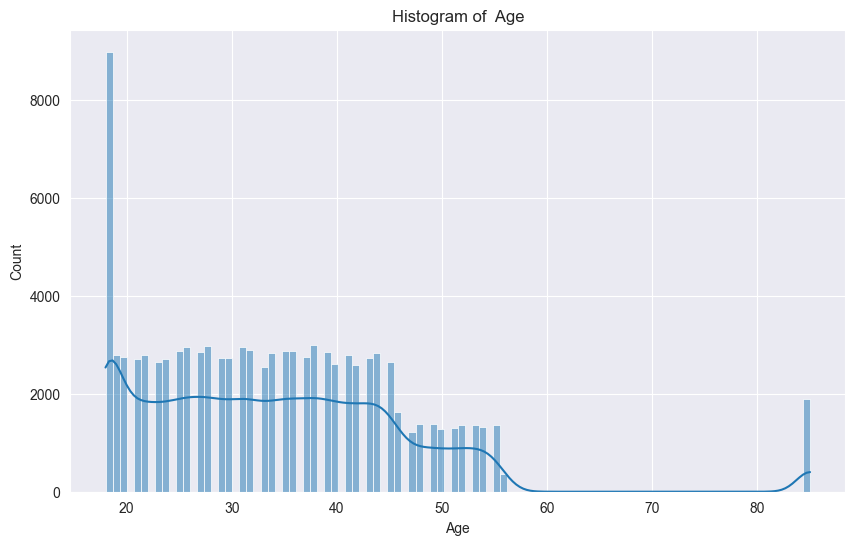

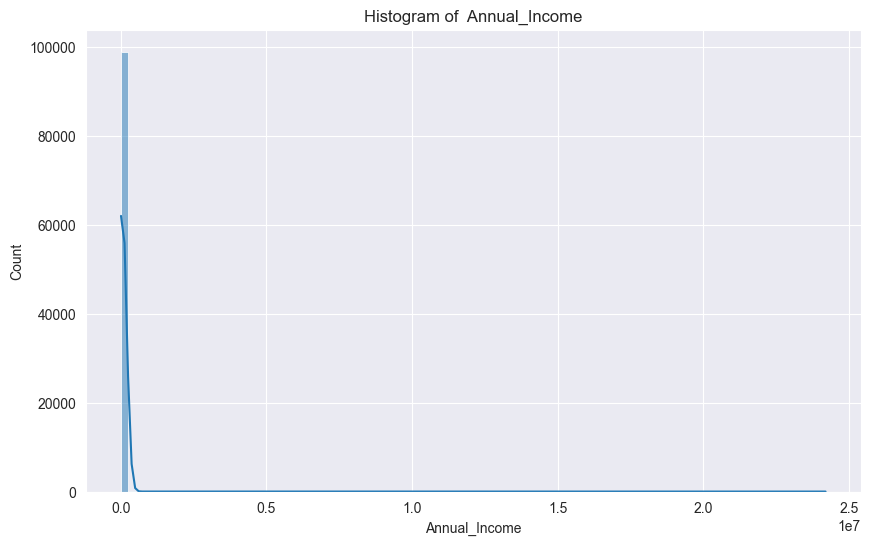

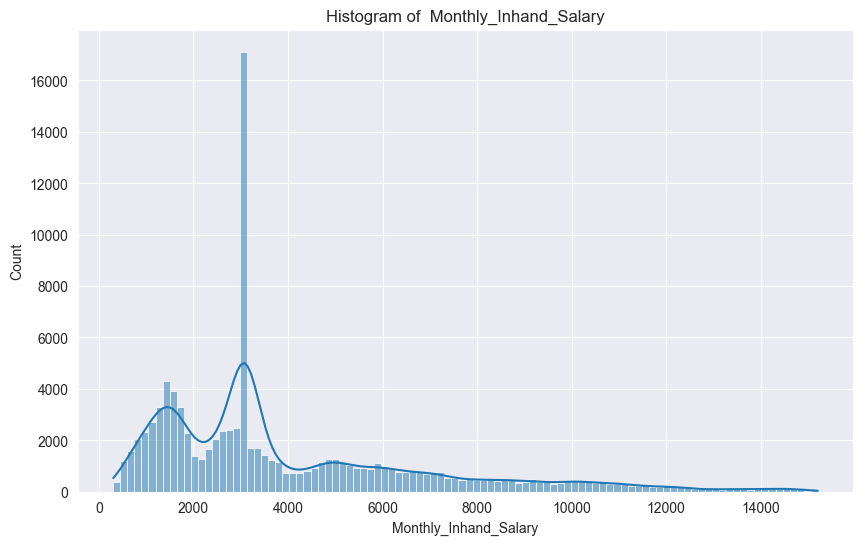

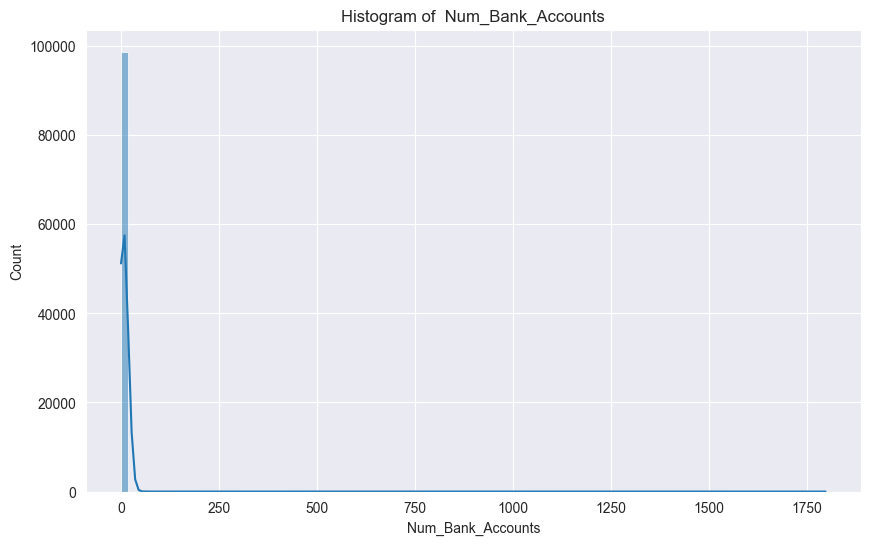

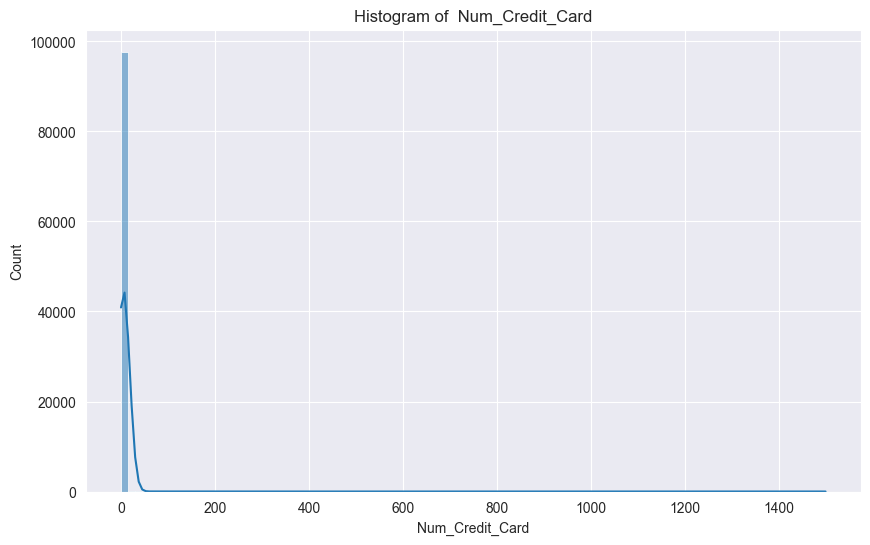

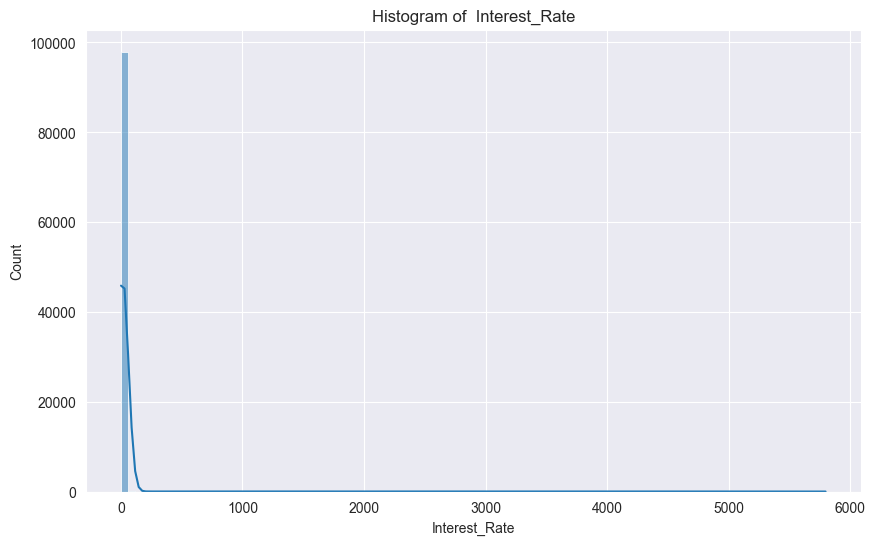

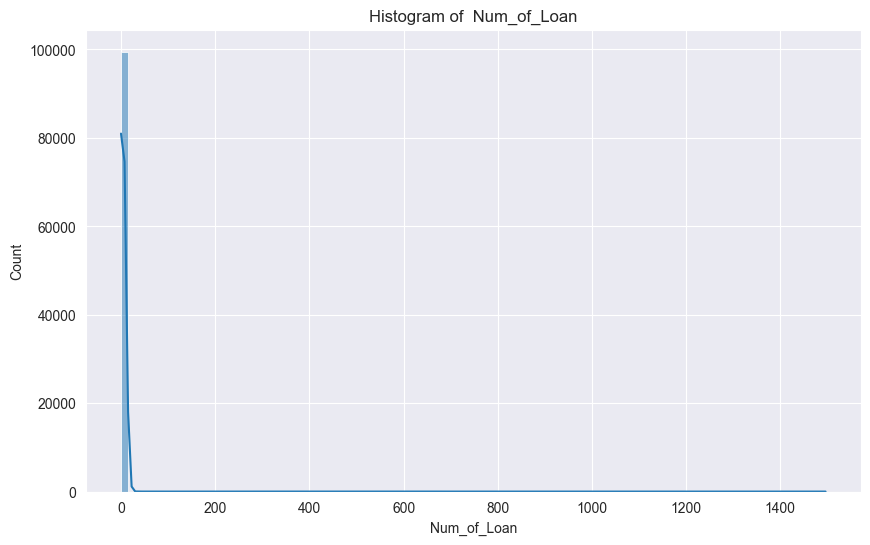

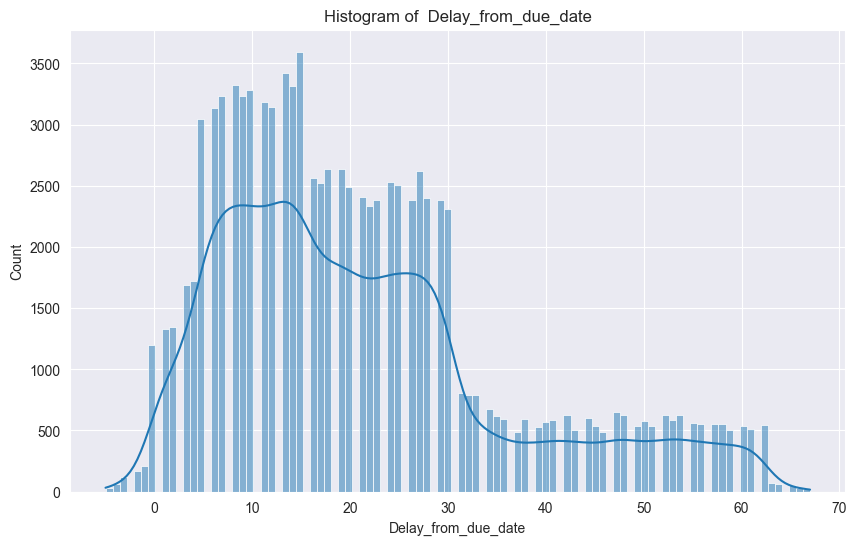

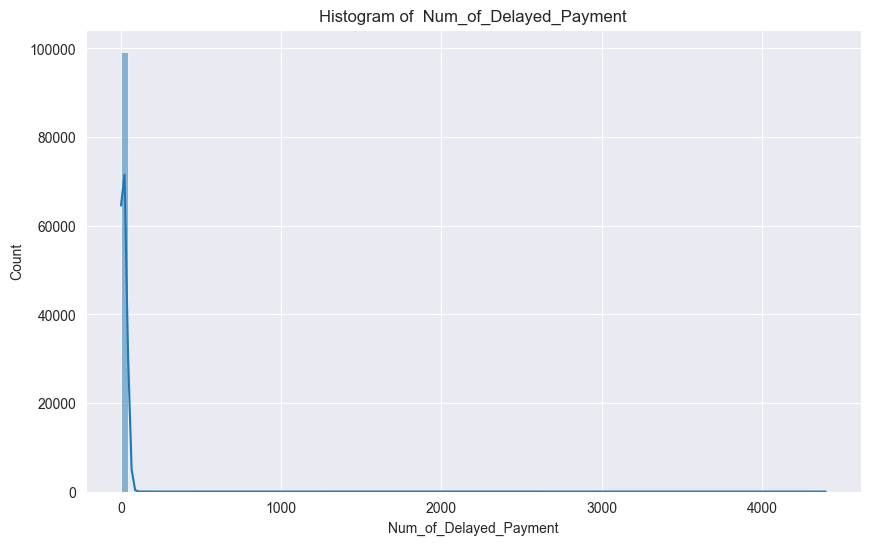

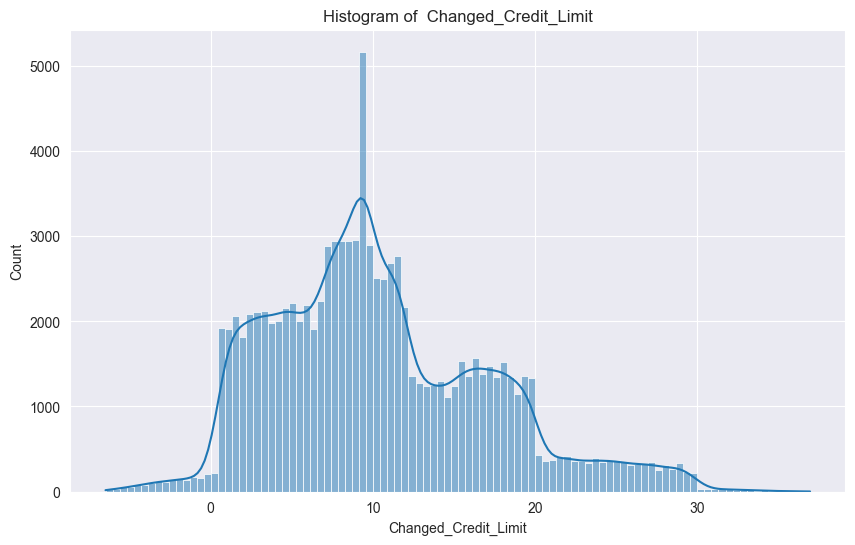

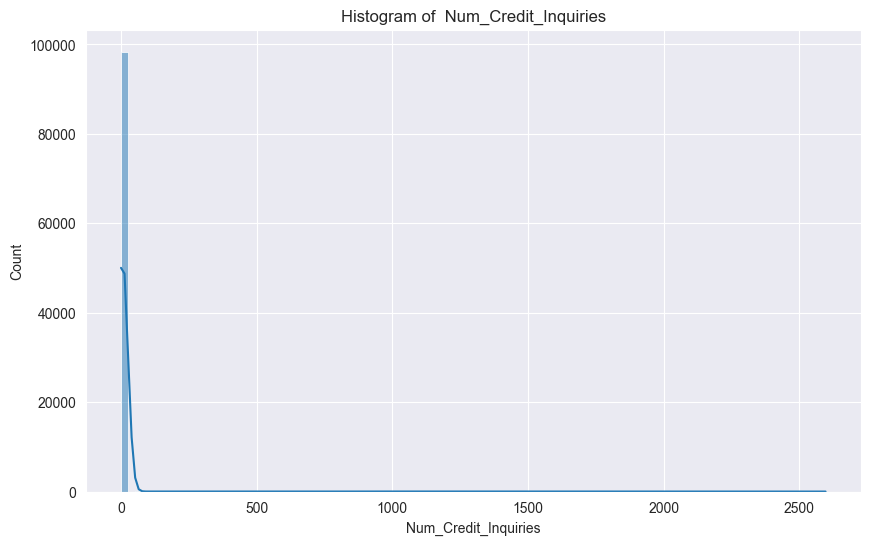

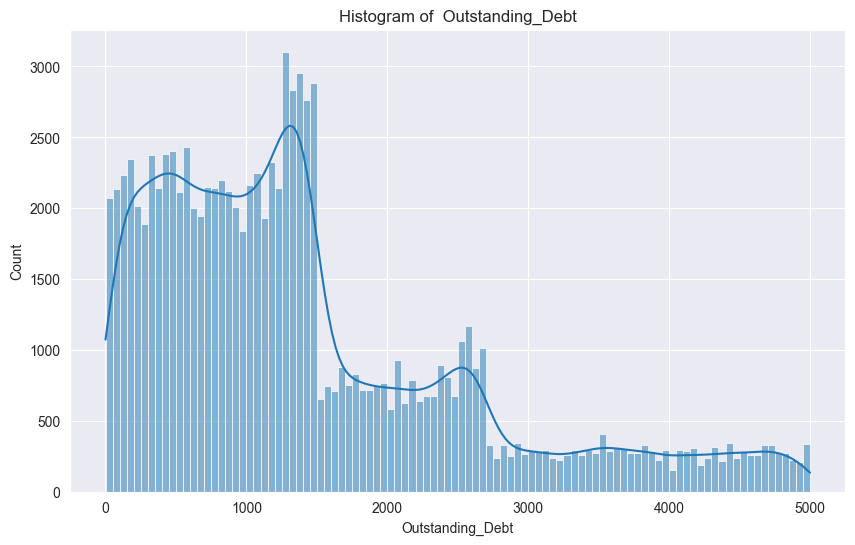

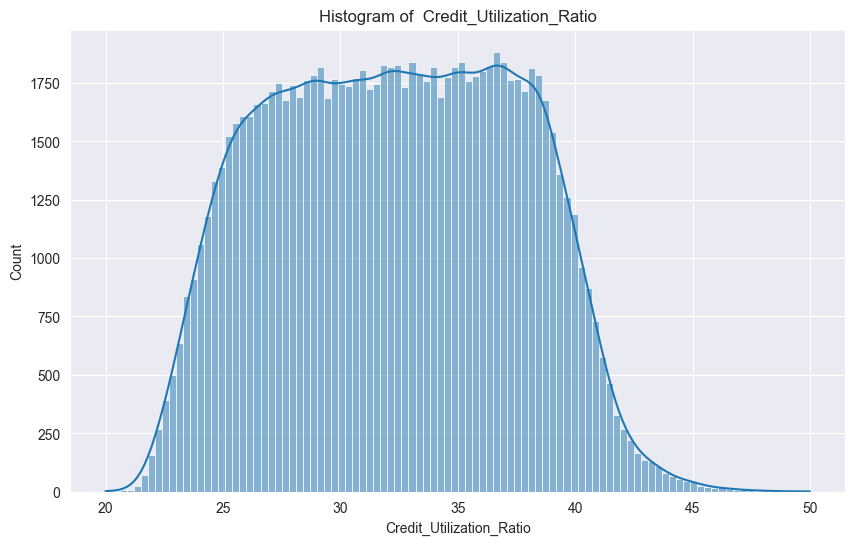

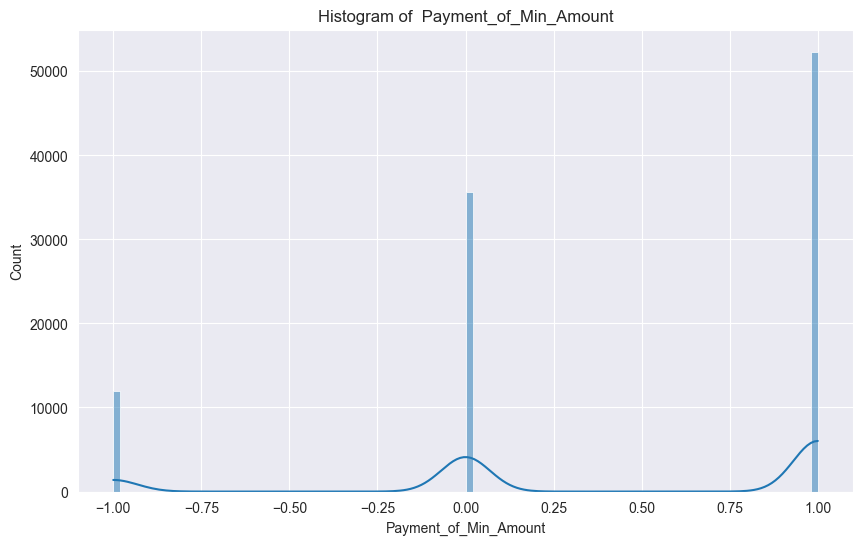

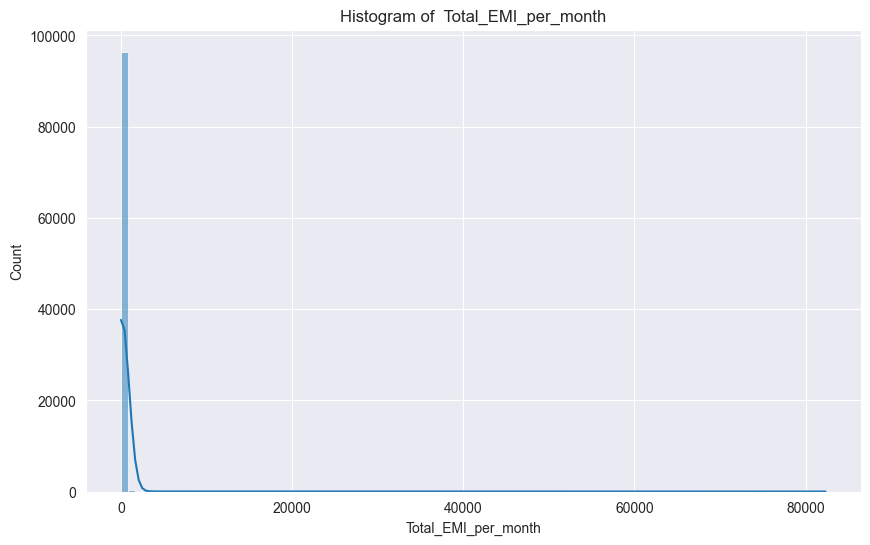

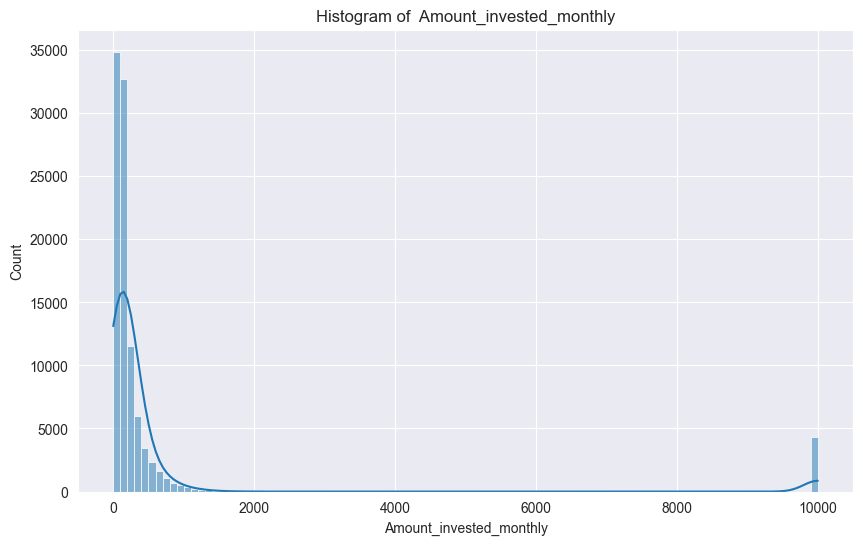

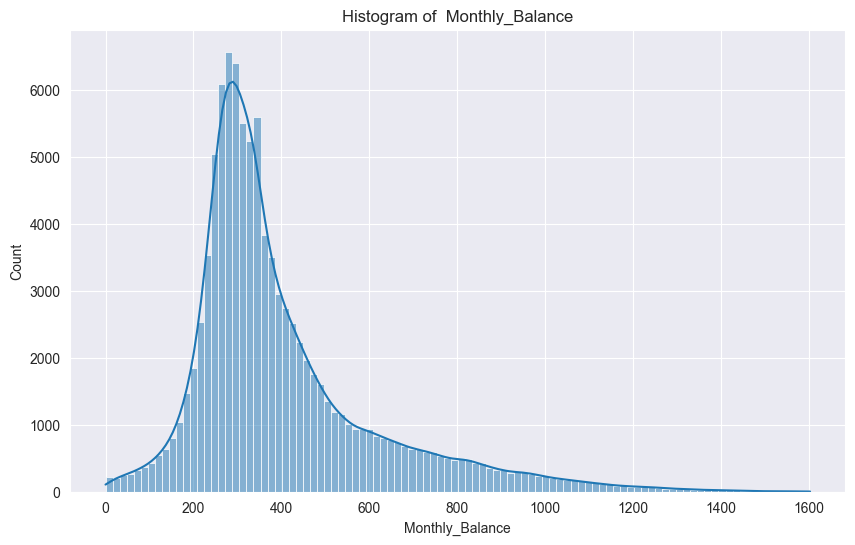

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
def visualize_numeric_cols_hist_plot(df,col_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=100,kde=True)
    plt.title(f"Histogram of  {col_name}")
    plt.show()

for col in numeric_cols:
    visualize_numeric_cols_hist_plot(df_train,col)

In [34]:
df_train.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
df_test.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [36]:
numeric_cols= df_train.select_dtypes(include=['number']).columns.tolist()
df_train[numeric_cols].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,34.30,"176,415.70","4,029.08",17.09,22.47,72.47,6.89,21.07,29.75,10.37,27.33,"1,426.22",32.29,221.00,0.40,"1,403.12",614.95,401.73
std,12.64,"1,429,618.05","2,961.36",117.40,129.06,466.42,59.15,14.86,218.02,6.72,191.29,"1,155.13",5.12,95.13,0.69,"8,306.04","1,999.73",212.78
min,18.00,"7,005.93",303.65,-1.00,0.00,1.00,0.00,-5.00,0.00,-6.49,0.00,0.23,20.00,1.00,-1.00,0.00,0.00,0.00
25%,24.00,"19,457.50","1,792.08",3.00,4.00,8.00,1.00,10.00,9.00,5.42,3.00,566.07,28.05,154.00,0.00,30.31,77.02,270.89
50%,33.00,"37,578.61","3,093.75",6.00,5.00,13.00,3.00,18.00,14.00,9.40,6.00,"1,166.15",32.31,219.00,1.00,69.25,135.93,336.72
75%,42.00,"72,790.92","5,371.53",7.00,7.00,20.00,5.00,28.00,18.00,14.66,9.00,"1,945.96",36.50,292.00,1.00,161.22,255.04,467.67
max,85.00,"24,198,062.00","15,204.63","1,798.00","1,499.00","5,797.00","1,496.00",67.00,"4,397.00",36.97,"2,597.00","4,998.07",50.00,404.00,1.00,"82,331.00","10,000.00","1,602.04"


In [37]:

df_train['Total_Num_Accounts'] = df_train['Num_Bank_Accounts'] + df_train['Num_Credit_Card']

# Calculate the total outstanding debt per account

df_train['Debt_Per_Account'] = df_train['Outstanding_Debt'] / df_train['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

df_train['Debt_to_Income_Ratio'] = df_train['Outstanding_Debt'] / df_train['Annual_Income']

# Calculate the total number of delayed payments per account

df_train['Delayed_Payments_Per_Account'] = df_train['Num_of_Delayed_Payment'] / df_train['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)

df_train['Total_Monthly_Expenses'] = df_train['Total_EMI_per_month'] + df_train['Amount_invested_monthly']



In [38]:


df_test['Total_Num_Accounts'] = df_test['Num_Bank_Accounts'] + df_test['Num_Credit_Card']

# Calculate the total outstanding debt per account

df_test['Debt_Per_Account'] = df_test['Outstanding_Debt'] / df_test['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

df_test['Debt_to_Income_Ratio'] = df_test['Outstanding_Debt'] / df_test['Annual_Income']

# Calculate the total number of delayed payments per account

df_test['Delayed_Payments_Per_Account'] = df_test['Num_of_Delayed_Payment'] / df_test['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)

df_test['Total_Monthly_Expenses'] = df_test['Total_EMI_per_month'] + df_test['Amount_invested_monthly']


In [39]:
def outlier_handling(df,col_name):
    q1=np.quantile(df[col_name],0.25)
    q3=np.quantile(df[col_name],0.75)
    IQR=q3-q1
    upper_limit=q3+1.5*IQR
    lower_limit=q1-1.5*IQR
    df[col_name]=df[col_name].apply(lambda x: lower_limit if x < lower_limit  else upper_limit if x > upper_limit else x)
    return df

numeric_cols=df_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove("Payment_of_Min_Amount")
for col in numeric_cols:
     df_train = outlier_handling(df_train,col)
     df_test = outlier_handling(df_test,col)



In [40]:
df_train[numeric_cols].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account,Total_Monthly_Expenses
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00",...,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,34.00,"51,253.26","3,956.89",5.47,5.67,15.01,3.43,20.90,13.51,10.35,...,32.29,221.00,108.05,191.31,387.09,11.33,124.06,0.05,1.23,336.25
std,11.57,"38,684.91","2,757.64",2.72,2.23,9.26,2.54,14.43,6.24,6.67,...,5.12,95.13,104.53,154.39,172.95,4.50,86.19,0.05,0.61,271.27
min,18.00,"7,005.93",303.65,-1.00,0.00,1.00,0.00,-5.00,0.00,-6.49,...,20.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,24.00,"19,457.50","1,792.08",3.00,4.00,8.00,1.00,10.00,9.00,5.42,...,28.05,154.00,30.31,77.02,270.89,8.00,57.14,0.01,0.88,134.99
50%,33.00,"37,578.61","3,093.75",6.00,5.00,13.00,3.00,18.00,14.00,9.40,...,32.31,219.00,69.25,135.93,336.72,11.00,112.15,0.03,1.21,233.85
75%,42.00,"72,790.92","5,371.53",7.00,7.00,20.00,5.00,28.00,18.00,14.66,...,36.50,292.00,161.22,255.04,467.67,14.00,174.06,0.07,1.57,451.95
max,69.00,"152,791.05","10,740.69",13.00,11.50,38.00,11.00,55.00,31.50,28.52,...,49.16,404.00,357.60,522.07,762.84,23.00,349.43,0.16,2.62,927.40


In [41]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import KNNImputer

# === 1. Eksik değerleri doldur ===
imputer1 = KNNImputer(n_neighbors=4)
imputer2 = KNNImputer(n_neighbors=4)

df_train[numeric_cols] = imputer1.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = imputer2.fit_transform(df_test[numeric_cols])

# === 2. Quantile Transformer uygula ===
quantile_scaler = QuantileTransformer(output_distribution='normal', random_state=42)

df_train[numeric_cols] = quantile_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = quantile_scaler.transform(df_test[numeric_cols])


In [42]:
# Quantile sonrası clipping
for col in numeric_cols:
    df_train[col] = df_train[col].clip(-3, 3)
    df_test[col] = df_test[col].clip(-3, 3)


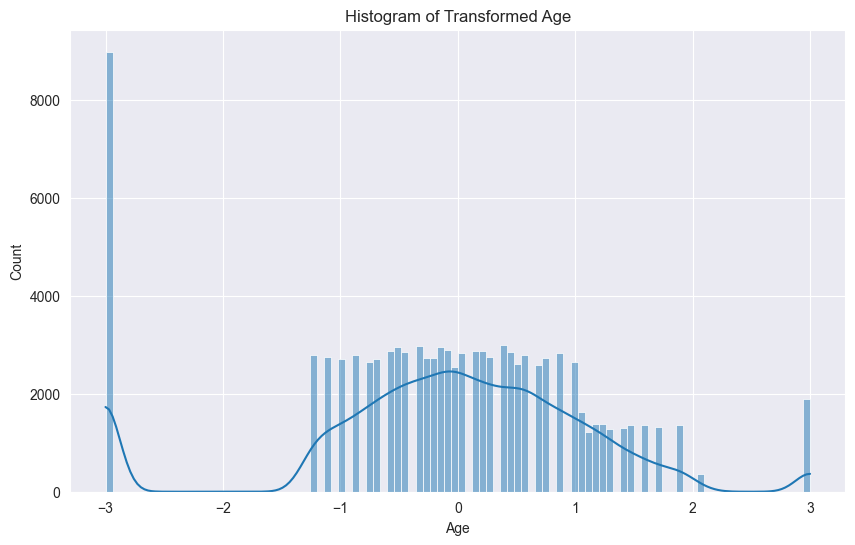

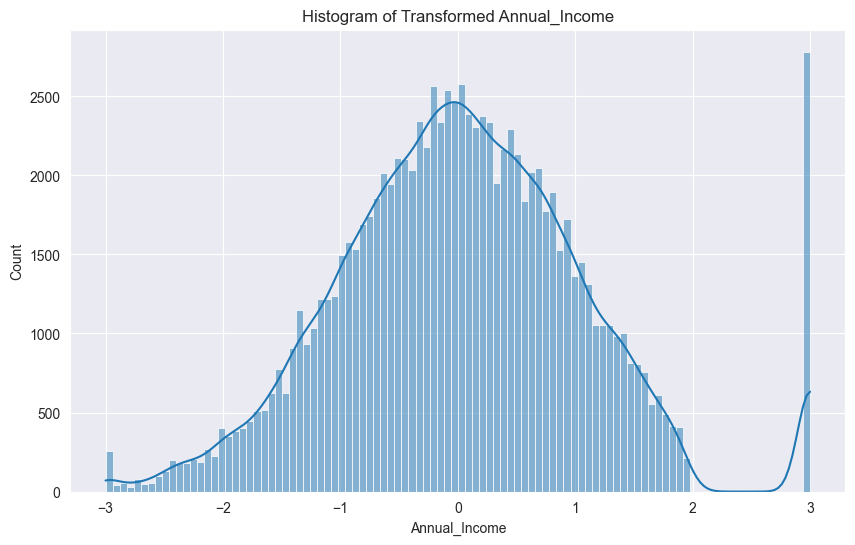

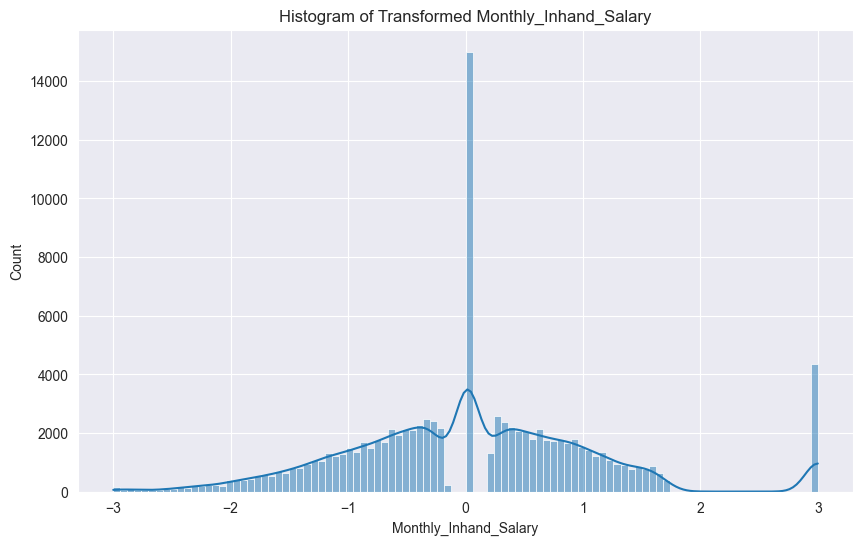

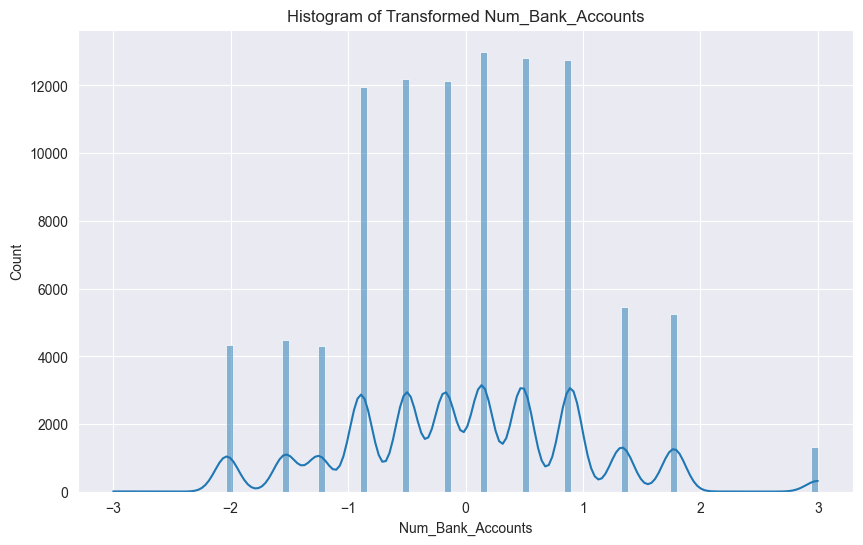

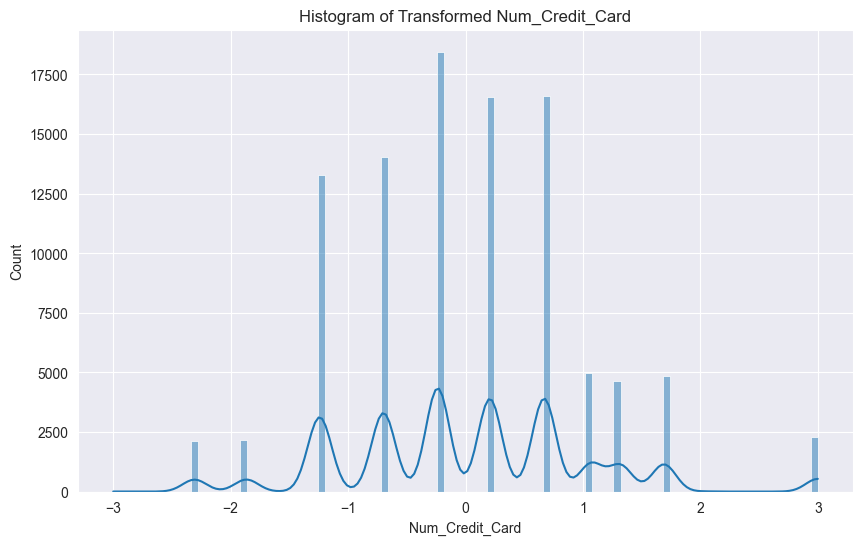

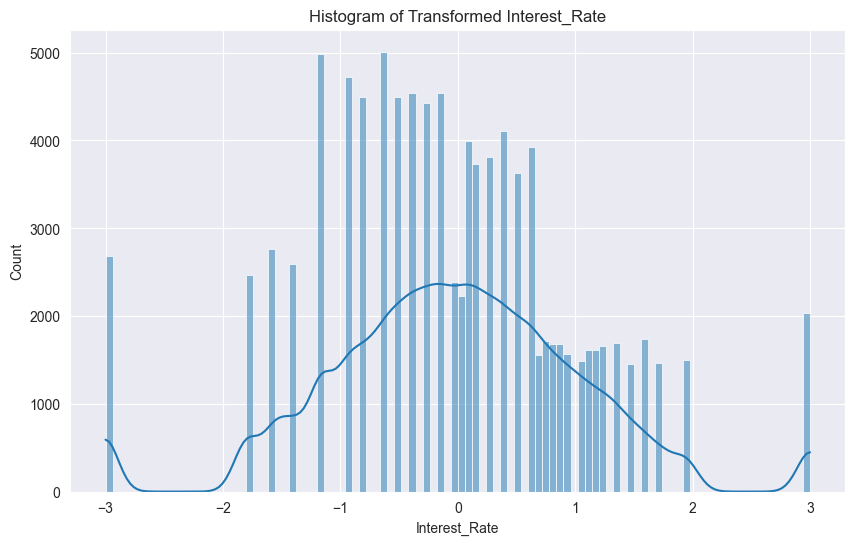

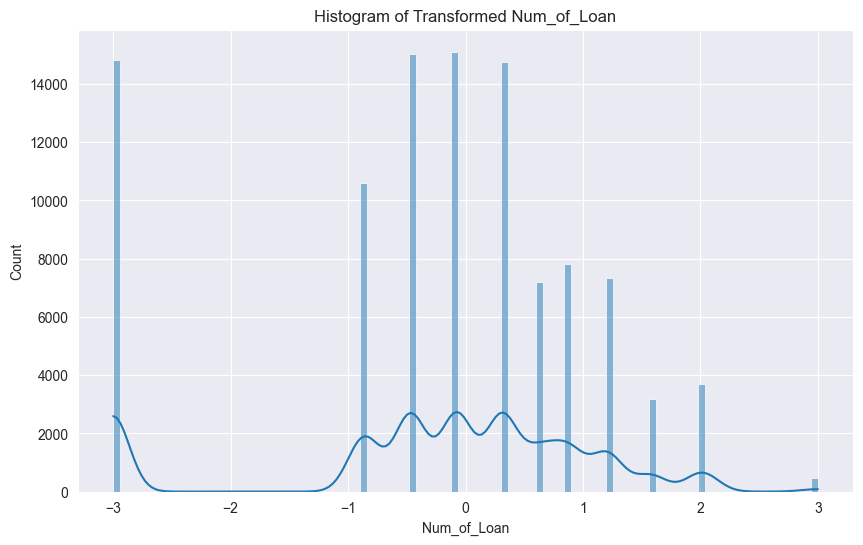

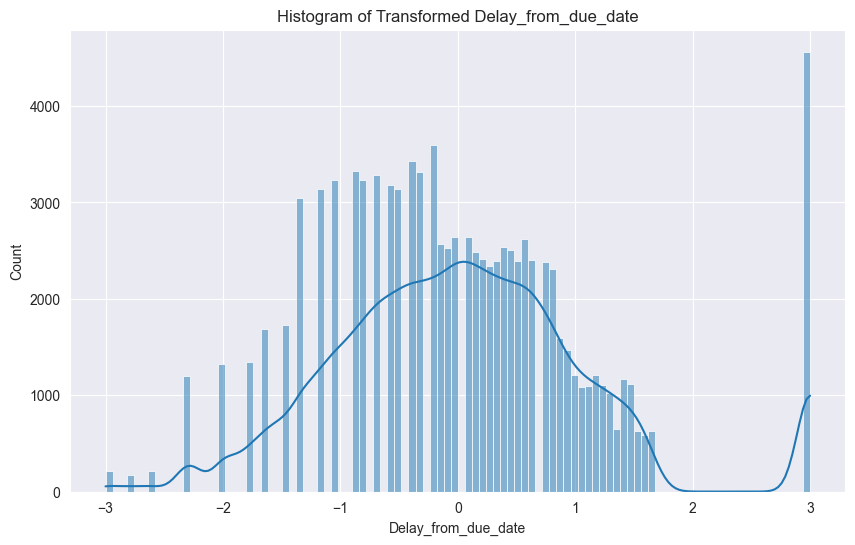

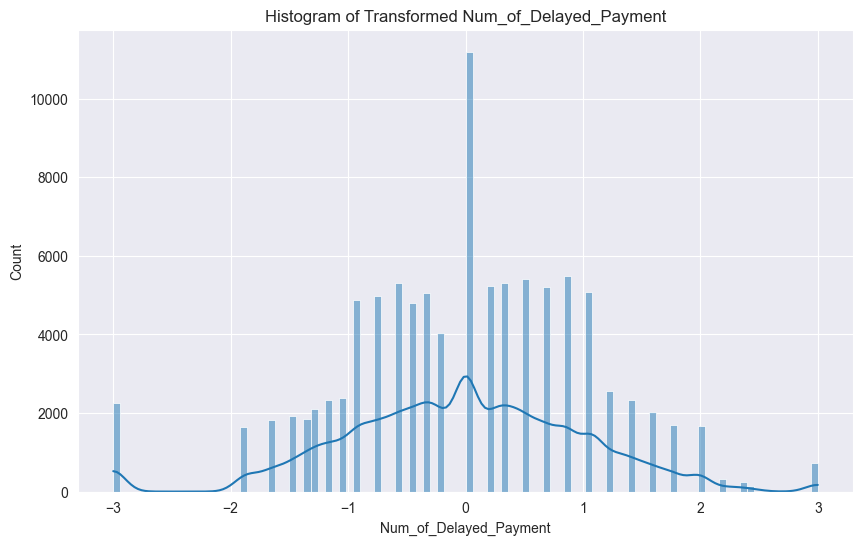

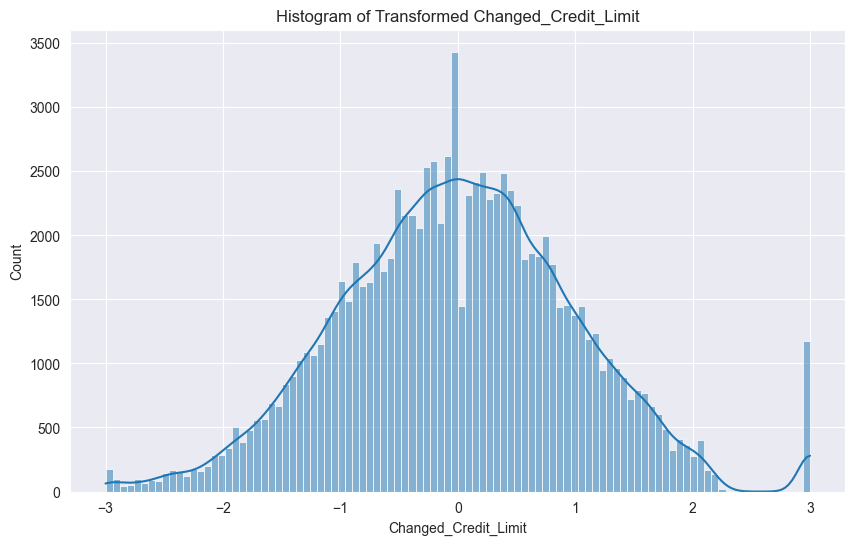

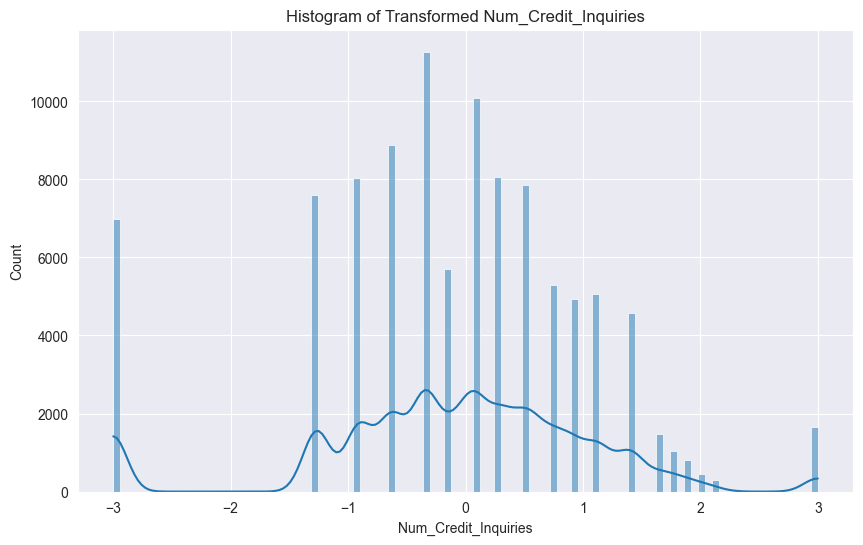

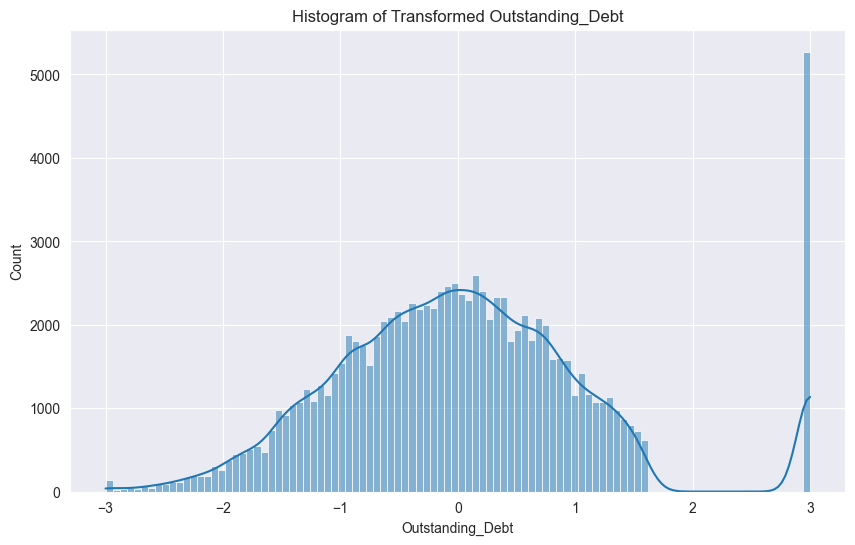

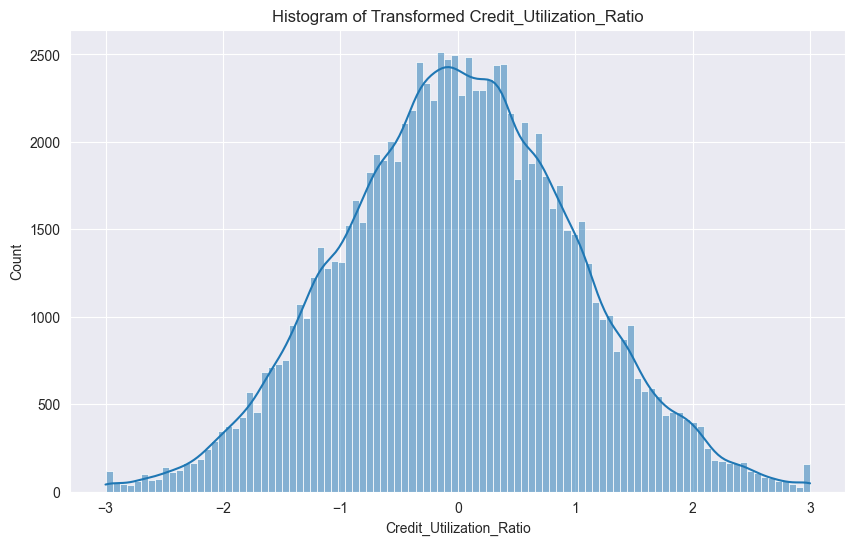

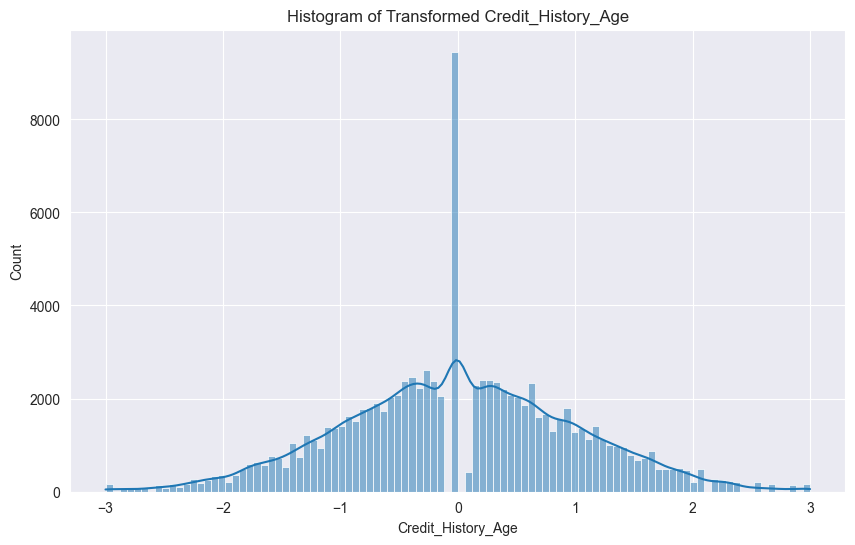

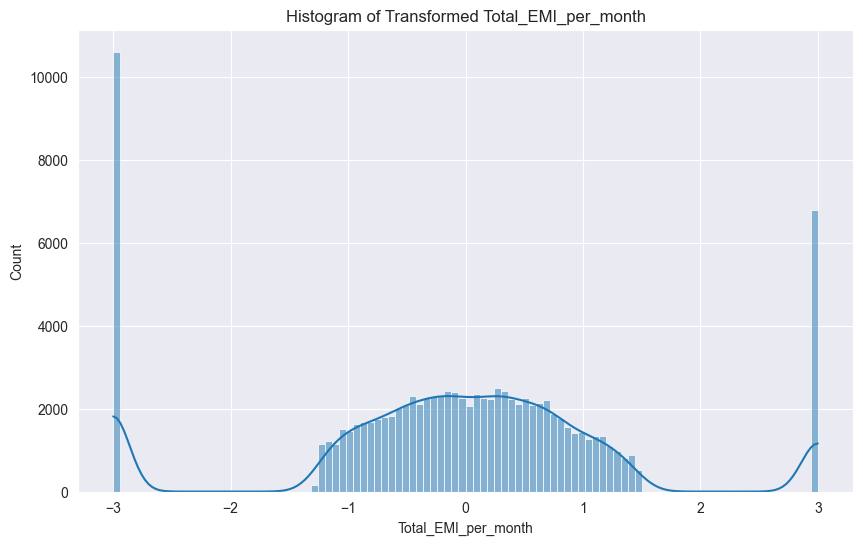

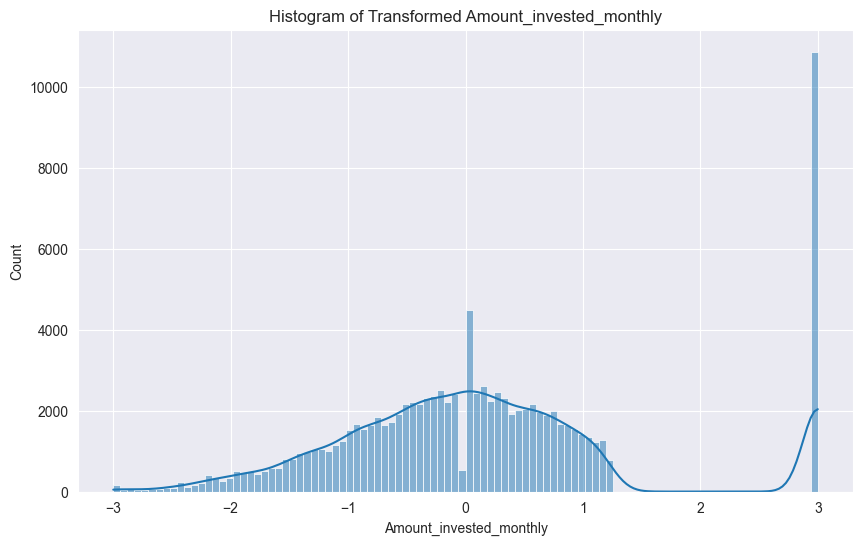

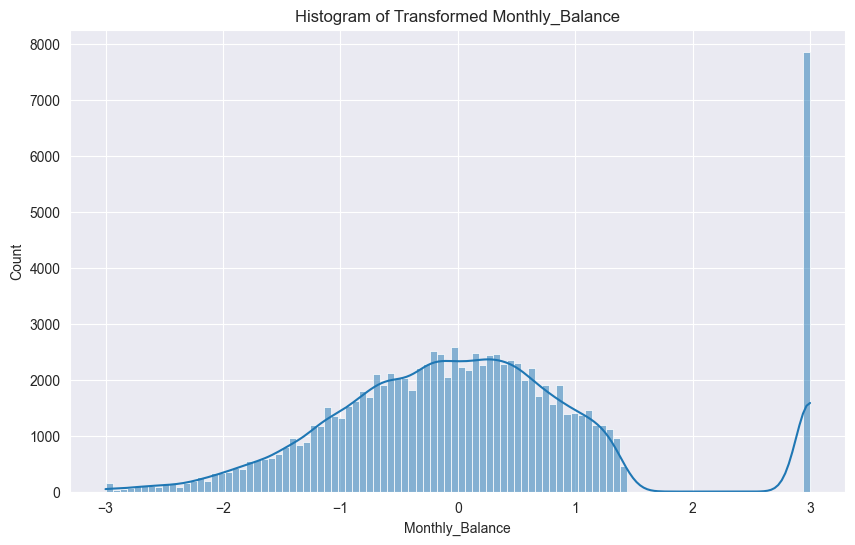

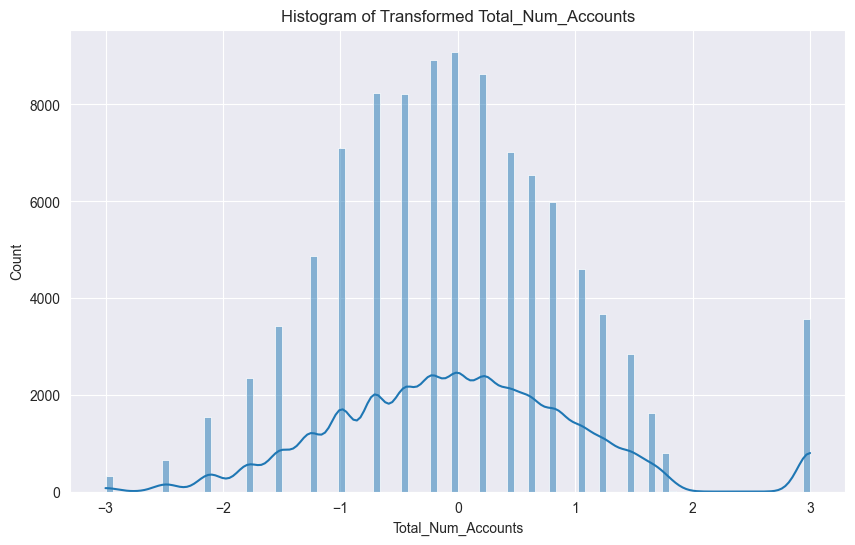

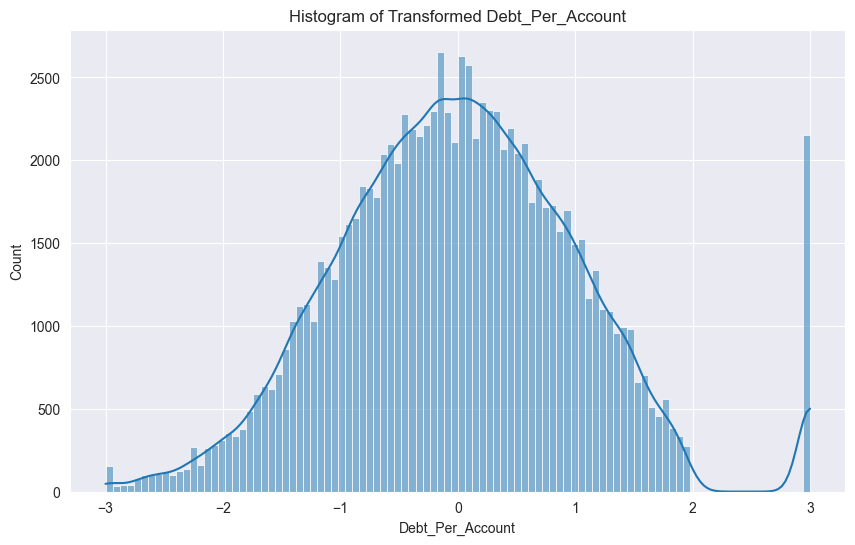

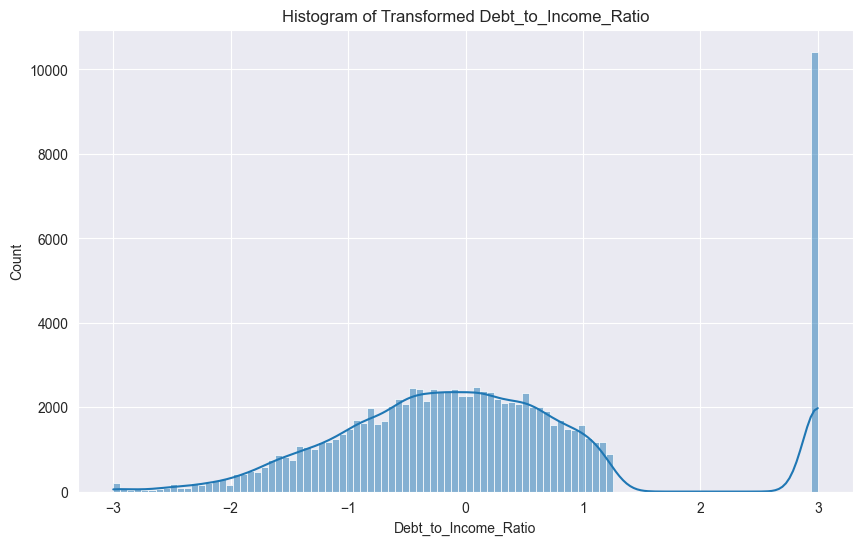

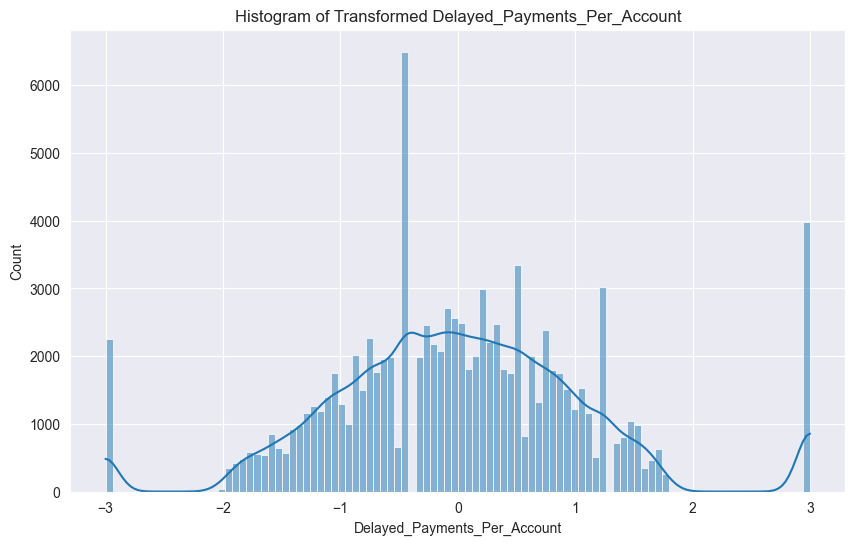

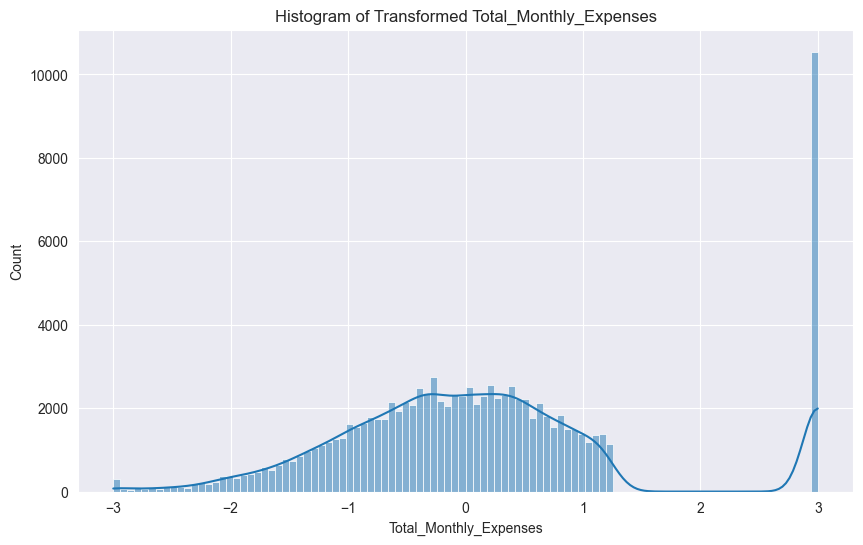

In [43]:
import seaborn as sns
def visualize_numeric_cols_hist_plot(df,col_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=100,kde=True)
    plt.title(f"Histogram of Transformed {col_name}")
    plt.show()

for col in numeric_cols:
    visualize_numeric_cols_hist_plot(df_train,col)

In [44]:
(df_train[numeric_cols]<0).sum()

Age                             50860
Annual_Income                   49513
Monthly_Inhand_Salary           42498
Num_Bank_Accounts               49397
Num_Credit_Card                 50060
Interest_Rate                   50094
Num_of_Loan                     55548
Delay_from_due_date             51496
Num_of_Delayed_Payment          45333
Changed_Credit_Limit            51047
Num_Credit_Inquiries            48442
Outstanding_Debt                50808
Credit_Utilization_Ratio        49994
Credit_History_Age              54533
Total_EMI_per_month             50081
Amount_invested_monthly         47760
Monthly_Balance                 49361
Total_Num_Accounts              54707
Debt_Per_Account                50270
Debt_to_Income_Ratio            51061
Delayed_Payments_Per_Account    50880
Total_Monthly_Expenses          49959
dtype: int64

In [45]:
cat_cols= df_train.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove("Credit_Score")
for col in cat_cols:
    print(f"Unique values in {col}: {df_train[col].value_counts()}")
    print("\n")

Unique values in Customer_ID: Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x5b48    8
CUS_0xa5f9    8
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
Name: count, Length: 12500, dtype: int64


Unique values in Month: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


Unique values in Occupation: Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


Unique values in Type_of_Loan: Type_of_Loan
Not Specified                                                            

In [46]:
target= df_train["Credit_Score"]
target.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [47]:
df_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Customer_ID        100000 non-null  object
 1   Month              100000 non-null  object
 2   Occupation         100000 non-null  object
 3   Type_of_Loan       100000 non-null  object
 4   Credit_Mix         100000 non-null  object
 5   Payment_Behaviour  100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [48]:
df_train["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [49]:
df_train["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                        12816
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
Student Loan                                                                                          1240
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                          8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                    8
Payday Loan, Student Loa

In [50]:
df_train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [51]:
df_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['Occupation'] = df_train['Occupation'].replace("_______","Unknown")

df_train['Occupation_label'] = le.fit_transform(df_train['Occupation'])
df_test['Occupation_label']= le.fit_transform(df_test['Occupation'])
df_train['Occupation_label'].value_counts()

Occupation_label
14    7062
7     6575
1     6355
4     6350
12    6299
9     6291
0     6271
2     6235
10    6232
13    6215
5     6174
3     6087
6     6085
8     5973
11    5911
15    5885
Name: count, dtype: int64

In [53]:
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].replace("!@9#%8", np.nan)
df_test["Payment_Behaviour"] = df_test["Payment_Behaviour"].replace("!@9#%8", np.nan)

mode_val = df_train["Payment_Behaviour"].mode()[0]
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].fillna(mode_val)
mode_val=df_test["Payment_Behaviour"].mode()[0]
df_test["Payment_Behaviour"] = df_test["Payment_Behaviour"].fillna(mode_val)

payment_map = {
    "Low_spent_Small_value_payments": 0,
    "Low_spent_Medium_value_payments": 1,
    "Low_spent_Large_value_payments": 2,
    "High_spent_Small_value_payments": 3,
    "High_spent_Medium_value_payments": 4,
    "High_spent_Large_value_payments": 5
}
df_train['Payment_Behaviour_Mapped'] = df_train['Payment_Behaviour'].map(payment_map)
df_test["Payment_Behaviour_Mapped"] = df_test["Payment_Behaviour"].map(payment_map)
df_train["Payment_Behaviour_Mapped"].value_counts()

Payment_Behaviour_Mapped
0    33113
4    17540
1    13861
5    13721
3    11340
2    10425
Name: count, dtype: int64

In [54]:
df_train["Credit_Mix"]=df_train["Credit_Mix"].replace("_", np.nan)
df_test["Credit_Mix"]=df_test["Credit_Mix"].replace("_", np.nan)

mode_value = df_train["Credit_Mix"].mode()[0]
df_train["Credit_Mix"] = df_train["Credit_Mix"].fillna(mode_value)
mode_value = df_test["Credit_Mix"].mode()[0]
df_test["Credit_Mix"]=df_test["Credit_Mix"].fillna(mode_value)

credit_mix_mapping={
    "Bad":0,
    "Standard":1,
    "Good":2
}

df_train["Credit_Mix_Mapped"]=df_train["Credit_Mix"].map(credit_mix_mapping)
df_test["Credit_Mix_Mapped"]=df_test["Credit_Mix"].map(credit_mix_mapping)

df_train["Credit_Mix_Mapped"].value_counts()

Credit_Mix_Mapped
1    56674
2    24337
0    18989
Name: count, dtype: int64

In [55]:
def clean_loan_values(s):
    s=re.sub(r",?\s*and\s*", ",", s)

    items=[item.strip() for item in s.split(",")]

    items=list(set(i for i in items if i))
    return items


Type Of Loan Satırlarındaki ayrı ayrı borç tiplerini liste haline getirir.

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer

df_train['Loan_List'] = df_train['Type_of_Loan'].apply(clean_loan_values)
df_test['Loan_List'] = df_test['Type_of_Loan'].apply(clean_loan_values)

mlb = MultiLabelBinarizer()
loan_encoded_train = mlb.fit_transform(df_train['Loan_List'])
loan_encoded_test = mlb.transform(df_test['Loan_List'])

loan_encoded_df_train = pd.DataFrame(loan_encoded_train, columns=mlb.classes_)
df_train_final = pd.concat([df_train, loan_encoded_df_train], axis=1)

loan_encoded_test = mlb.transform(df_test['Loan_List'])
loan_encoded_df_test = pd.DataFrame(loan_encoded_test, columns=mlb.classes_)
df_test_final = pd.concat([df_test, loan_encoded_df_test], axis=1)

In [57]:
drop_cols = ['Type_of_Loan', 'Loan_List', 'Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Customer_ID', 'Month']
df_train_final.drop(columns=drop_cols, inplace=True)
df_test_final.drop(columns=drop_cols, inplace=True)

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  float64
 1   Annual_Income                 100000 non-null  float64
 2   Monthly_Inhand_Salary         100000 non-null  float64
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  float64
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Outstanding_Debt              100000 non-null  float64
 12  Credit_Utilization_Ratio      100000 non-null

In [58]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           50000 non-null  float64
 1   Annual_Income                 50000 non-null  float64
 2   Monthly_Inhand_Salary         50000 non-null  float64
 3   Num_Bank_Accounts             50000 non-null  float64
 4   Num_Credit_Card               50000 non-null  float64
 5   Interest_Rate                 50000 non-null  float64
 6   Num_of_Loan                   50000 non-null  float64
 7   Delay_from_due_date           50000 non-null  float64
 8   Num_of_Delayed_Payment        50000 non-null  float64
 9   Changed_Credit_Limit          50000 non-null  float64
 10  Num_Credit_Inquiries          50000 non-null  float64
 11  Outstanding_Debt              50000 non-null  float64
 12  Credit_Utilization_Ratio      50000 non-null  float64
 13  C

In [59]:
X_train = df_train_final.select_dtypes(include=[np.number])
X_test = df_test_final.select_dtypes(include=[np.number])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  float64
 1   Annual_Income                 100000 non-null  float64
 2   Monthly_Inhand_Salary         100000 non-null  float64
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  float64
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Outstanding_Debt              100000 non-null  float64
 12  Credit_Utilization_Ratio      100000 non-null

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           50000 non-null  float64
 1   Annual_Income                 50000 non-null  float64
 2   Monthly_Inhand_Salary         50000 non-null  float64
 3   Num_Bank_Accounts             50000 non-null  float64
 4   Num_Credit_Card               50000 non-null  float64
 5   Interest_Rate                 50000 non-null  float64
 6   Num_of_Loan                   50000 non-null  float64
 7   Delay_from_due_date           50000 non-null  float64
 8   Num_of_Delayed_Payment        50000 non-null  float64
 9   Changed_Credit_Limit          50000 non-null  float64
 10  Num_Credit_Inquiries          50000 non-null  float64
 11  Outstanding_Debt              50000 non-null  float64
 12  Credit_Utilization_Ratio      50000 non-null  float64
 13  C

In [61]:
from sklearn.preprocessing import LabelEncoder

le_score = LabelEncoder()
df_train_final["Credit_Score_Label"] = le_score.fit_transform(df_train["Credit_Score"])

df_train_final=df_train_final.drop(columns=["Credit_Score"])






In [62]:
le_score.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [63]:
target= df_train_final["Credit_Score_Label"]
target.value_counts()

Credit_Score_Label
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [64]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_train = X_train.clip(-1e5, 1e5)

In [65]:
target_binary = df_train_final['Credit_Score_Label'].apply(lambda x: 1 if x == 1 else 0)


In [66]:
df_for_model=X_train.copy()
df_for_model["target"]=target_binary.values

In [67]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  float64
 1   Annual_Income                 100000 non-null  float64
 2   Monthly_Inhand_Salary         100000 non-null  float64
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  float64
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Outstanding_Debt              100000 non-null  float64
 12  Credit_Utilization_Ratio      100000 non-null

In [68]:
df_for_model.to_csv("df_for_model.csv",
                      index=False,             # indexi kaydetme
                      float_format="%.8f",     # hassasiyet korunsun
                      encoding="utf-8",        # Türkçe karakter garantisi
                      na_rep="NA")             # NaN'ler açıkça NA yazılsın


In [69]:
df_loaded = pd.read_csv("../data/df_for_model.csv", na_values="NA")
df_loaded.isnull().sum()


Age                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Monthly_Balance                 0
Total_Num_Accounts              0
Debt_Per_Account                0
Debt_to_Income_Ratio            0
Delayed_Payments_Per_Account    0
Total_Monthly_Expenses          0
Occupation_label                0
Payment_Behaviour_Mapped        0
Credit_Mix_Mapped               0
Auto Loan                       0
Credit-Builder Loan             0
Debt Consolidation Loan         0
Home Equity Lo

In [70]:
train_x,test_x,train_y,test_y=train_test_split(X_train,target, test_size=0.2, random_state=42,stratify=target)



In [71]:
preprocessed_df = pd.concat([X_train, target], axis=1)
preprocessed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  float64
 1   Annual_Income                 100000 non-null  float64
 2   Monthly_Inhand_Salary         100000 non-null  float64
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  float64
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Outstanding_Debt              100000 non-null  float64
 12  Credit_Utilization_Ratio      100000 non-null

In [72]:
preprocessed_df.to_csv("preprocessed_data.csv", index=False)

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)


rf.fit(train_x,train_y)

RandomForestClassifier(random_state=42)

In [74]:
# 1. NaN var mı?
print("NaN:", np.isnan(X_train).sum().sum())

# 2. Inf var mı?
print("Inf:", np.isinf(X_train).sum().sum())

# 3. Maksimum değerler?
print("Max value:", X_train.max().max())


NaN: 0
Inf: 0
Max value: 15.0


In [75]:
X_train_cleaned = X_train.replace([np.inf, -np.inf], np.nan)
X_train_cleaned = X_train_cleaned.fillna(0)  # veya median gibi bir strateji


In [76]:
rf.score(test_x,test_y)

0.7936

In [77]:
from sklearn.metrics import classification_report

y_pred_rf=rf.predict(test_x)
print(classification_report(test_y,y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3566
           1       0.79      0.81      0.80      5799
           2       0.81      0.81      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

  File "C:\PycharmProjects\CreditCardClassificationProject\tf310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [79]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
rf.score(test_x, test_y)

0.79505

In [80]:
from sklearn.metrics import classification_report

y_pred_rf=rf.predict(test_x)
print(classification_report(test_y,y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3566
           1       0.77      0.84      0.80      5799
           2       0.85      0.77      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [81]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced',oob_score=True)
rf.fit(X_resampled, y_resampled)
print(rf.score(test_x, test_y))
print(rf.oob_score_)

0.79505
0.8641795372089925


In [82]:
from sklearn.metrics import classification_report

y_pred_rf=rf.predict(test_x)
print(classification_report(test_y,y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      3566
           1       0.77      0.84      0.80      5799
           2       0.85      0.77      0.81     10635

    accuracy                           0.80     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [83]:
train_y.value_counts()

Credit_Score_Label
2    42539
1    23199
0    14262
Name: count, dtype: int64

In [84]:
y_resampled.value_counts()

Credit_Score_Label
2    42539
1    42539
0    42539
Name: count, dtype: int64

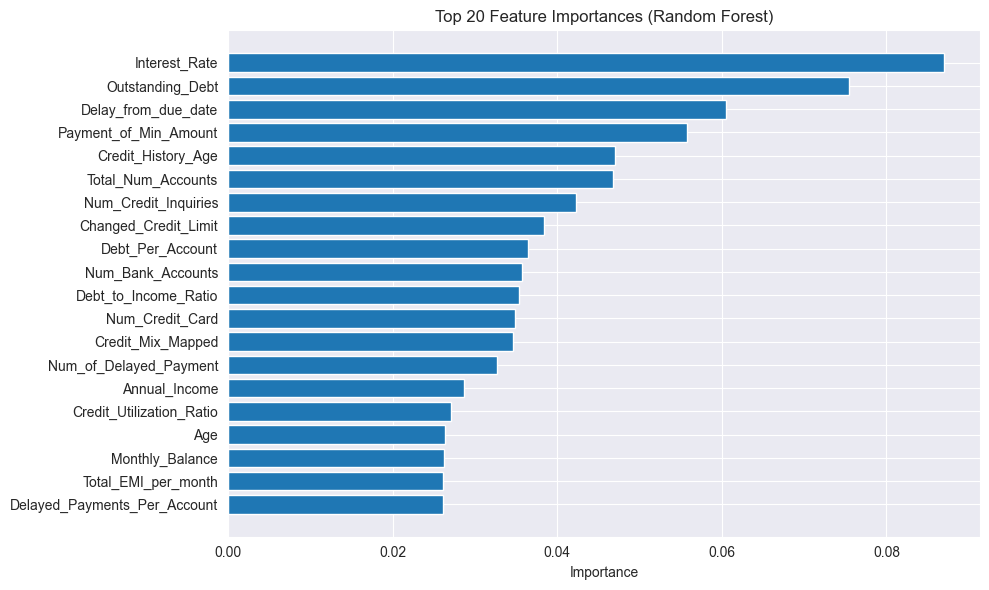

In [85]:
feature_importance=rf.feature_importances_
import pandas as pd
import matplotlib.pyplot as plt

# Özellik önemlerini al
importances = rf.feature_importances_
feature_names = X_train.columns  # Eğer DataFrame ise

# DataFrame'e dök
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# İlk 20'yi görselleştir
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:20][::-1], feat_imp_df['Importance'][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [86]:
most_important_features=feat_imp_df['Feature'][:20][::-1]
most_important_features

21    Delayed_Payments_Per_Account
15             Total_EMI_per_month
17                 Monthly_Balance
0                              Age
12        Credit_Utilization_Ratio
1                    Annual_Income
8           Num_of_Delayed_Payment
25               Credit_Mix_Mapped
4                  Num_Credit_Card
20            Debt_to_Income_Ratio
3                Num_Bank_Accounts
19                Debt_Per_Account
9             Changed_Credit_Limit
10            Num_Credit_Inquiries
18              Total_Num_Accounts
13              Credit_History_Age
14           Payment_of_Min_Amount
7              Delay_from_due_date
11                Outstanding_Debt
5                    Interest_Rate
Name: Feature, dtype: object

In [87]:
train_x,test_x,train_y,test_y=train_test_split(X_train,target_binary, test_size=0.2, random_state=42,stratify=target_binary)

In [88]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
train_x,train_y=smote.fit_resample(train_x, train_y)

In [89]:
train_y.value_counts()

Credit_Score_Label
0    56802
1    56802
Name: count, dtype: int64

In [90]:
rf = RandomForestClassifier(random_state=42,class_weight='balanced',oob_score=True)
rf.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [91]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(test_x)
print(classification_report(test_y, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     14200
           1       0.78      0.82      0.80      5800

    accuracy                           0.88     20000
   macro avg       0.85      0.86      0.86     20000
weighted avg       0.88      0.88      0.88     20000



In [92]:
from sklearn.metrics import precision_recall_curve

y_scores = rf.predict_proba(test_x)[:, 1]  # sınıf 1 olasılıkları
prec, rec, thresholds = precision_recall_curve(test_y, y_scores)

f1s = 2 * (prec * rec) / (prec + rec + 1e-8)
best_idx = f1s.argmax()

print(f"Best F1: {f1s[best_idx]:.4f} at threshold: {thresholds[best_idx]:.4f}")

# Yeni threshold ile yeniden etiketle
y_pred_custom = (y_scores > thresholds[best_idx]).astype(int)
print(classification_report(test_y, y_pred_custom))

Best F1: 0.8112 at threshold: 0.3800
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     14200
           1       0.74      0.89      0.81      5800

    accuracy                           0.88     20000
   macro avg       0.85      0.88      0.86     20000
weighted avg       0.89      0.88      0.88     20000



In [93]:
rf.score(test_x, test_y)

0.8805

In [94]:
rf.oob_score_

0.9190169360233794

In [95]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(rf,X_train,target_binary,cv=5,scoring='f1_weighted')
print(f"CV mean: {cv.mean():.4f}")
print(f"CV: {cv}")

CV mean: 0.8120
CV: [0.80576292 0.8152901  0.8127513  0.80941903 0.8167349 ]


  File "C:\PycharmProjects\CreditCardClassificationProject\tf310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


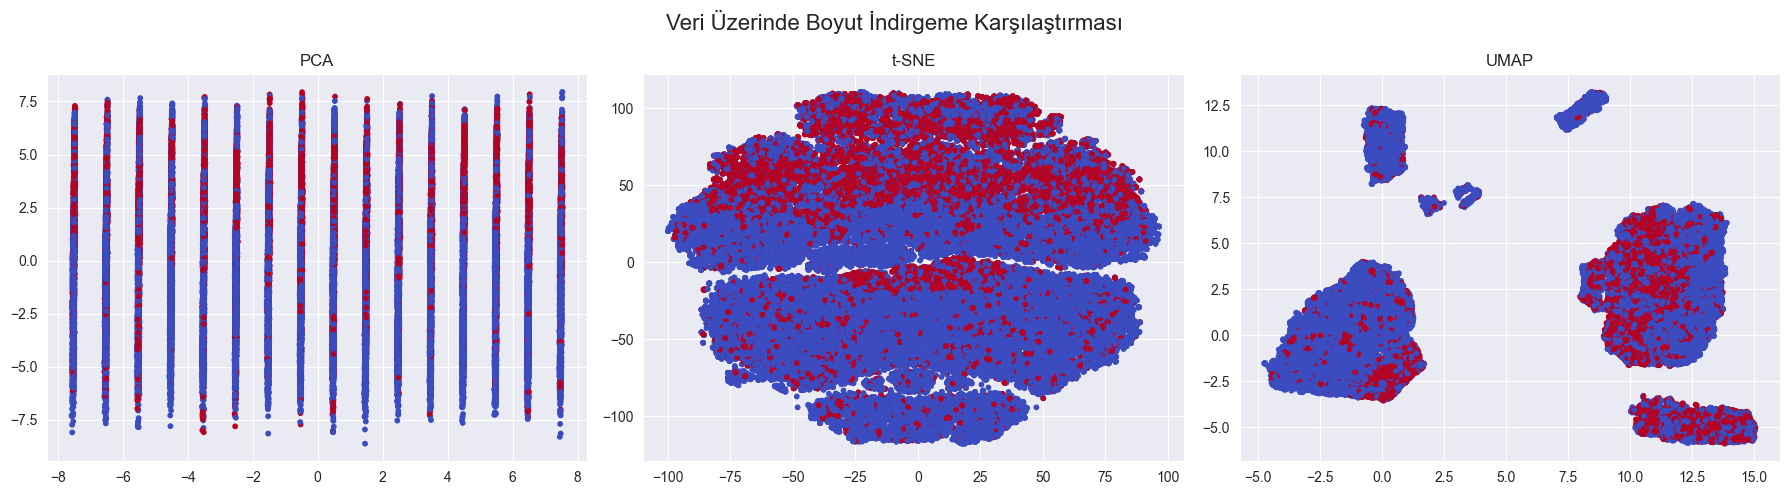

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler

# 1. Verini yükle (burada örnek olarak `X` ve `y` verildi)
# X, y = <kendi_verinizi_yükleyin>  # X özellikler, y etiketler

y=target_binary


X_scaled = X_train

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 5. UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 6. Görselleştirme
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=10)
axs[0].set_title('PCA')

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=10)
axs[1].set_title('t-SNE')

axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=10)
axs[2].set_title('UMAP')

plt.suptitle("Veri Üzerinde Boyut İndirgeme Karşılaştırması", fontsize=16)
plt.tight_layout()
plt.show()


In [68]:
train_x,test_x,train_y,test_y=train_test_split(X_train,target_binary, test_size=0.2, random_state=42,stratify=target_binary)

In [100]:
train_x.shape

(80000, 35)

In [101]:
test_x.shape

(20000, 35)

In [102]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA modelini tanımla
pca = PCA(n_components=2, random_state=42)

# 1. Fit sadece train_x'e
pca.fit(train_x)

# 2. Transform hem train hem test
train_pca = pca.transform(train_x)
test_pca = pca.transform(test_x)

# 3. DataFrame'e dönüştür ve PCA sütunlarını ekle
train_x = pd.DataFrame(train_x).reset_index(drop=True)
test_x = pd.DataFrame(test_x).reset_index(drop=True)

train_x["PCA-1"] = train_pca[:, 0]
train_x["PCA-2"] = train_pca[:, 1]

test_x["PCA-1"] = test_pca[:, 0]
test_x["PCA-2"] = test_pca[:, 1]


In [103]:
train_x.columns = train_x.columns.astype(str)
test_x.columns = test_x.columns.astype(str)

In [104]:
rf=RandomForestClassifier(random_state=42,class_weight='balanced')
rf.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [105]:
y_pred_rf = rf.predict(test_x)
print(classification_report(test_y, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14200
           1       0.79      0.75      0.77      5800

    accuracy                           0.87     20000
   macro avg       0.85      0.83      0.84     20000
weighted avg       0.87      0.87      0.87     20000



In [236]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# === 1. Train/Test böl ===
train_x, test_x, train_y, test_y = train_test_split(
    X_train, target_binary, test_size=0.2, stratify=y, random_state=42
)

# === 2. Alt modeller ===
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

# === 3. Meta-model ===
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# === 4. StackingClassifier ===
stack = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=meta_model,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# === 5. Eğit ===
stack.fit(train_x, train_y)

# === 6. Tahmin ve Değerlendirme ===
y_pred = stack.predict(test_x)

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))


[[12897  1303]
 [ 1930  3870]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14200
           1       0.75      0.67      0.71      5800

    accuracy                           0.84     20000
   macro avg       0.81      0.79      0.80     20000
weighted avg       0.83      0.84      0.84     20000



In [237]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stack, X_train, target_binary, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-Validation F1 (macro):", scores)
print("Ortalama:", scores.mean())


Cross-Validation F1 (macro): [0.81875 0.82645 0.8269  0.82135 0.8357 ]
Ortalama: 0.8258300000000001


In [239]:
rf.score(test_x, test_y)

0.86945

In [240]:
y_pred_rf = rf.predict(test_x)
print(classification_report(test_y, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14200
           1       0.78      0.76      0.77      5800

    accuracy                           0.87     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.87      0.87      0.87     20000



In [67]:
import joblib

final_stack_optimized=joblib.load('models/stack_supervised.pkl',mmap_mode='r')

In [71]:
from sklearn.metrics import classification_report

y_pred_fst=final_stack_optimized.predict(test_x)
print(classification_report(test_y, y_pred_fst))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     14200
           1       0.79      0.80      0.79      5800

    accuracy                           0.88     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.88      0.88      0.88     20000

